In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as mn
import re
import datetime
#import dask.dataframe as dd

In [2]:
sns.set(style="darkgrid")

In [3]:
pd.set_option('display.max_columns', 500)

#### load_join function to join multiple files : 

In [4]:
def load_join(path,fs,ls):
    d = pd.read_csv(path+str(fs)+".txt",encoding = "ISO-8859-1",sep=";")
    for i in range(fs+1,ls):
        d = d.append(pd.read_csv(path+str(i)+".txt",encoding = "ISO-8859-1",sep=";"))
    return d

#### not_pattern function to seek if a pattern doesn't correspond to a particular data : 

In [5]:
def not_pattern(pattern,data):
    p = re.compile(pattern)
    k = 0
    for i in data.values:
        m = p.match(i)
        if not m:
            k = k + 1
    return k

### Data from 2011-2014 : 

The data used 

In [6]:
df2 = load_join("Mitakus Data/Data",2011,2015)

C:\Users\Aziz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12148979 entries, 0 to 2958466
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              object
Amount             int64
Revenue            object
ItemDescription    object
NetTotal           object
StandardPrice      object
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(1), int64(13), object(10)
memory usage: 2.3+ GB


In [8]:
df2.shape

(12148979, 24)

#### Dropping duplicates : 

In [9]:
df2 = df2.drop_duplicates()

In [10]:
df2 = df2.reset_index(drop=True)

#### Checking some patterns : 

In [14]:
not_pattern("\d{2}:\d{2}$",df2["Time"])

0

In [13]:
not_pattern("\d{2}\.\d{2}\.20\d{2}$",df2["Date"])

0

#### Creating a DateTime field : 

In [11]:
df2["DateTime"] = df2.Date+" "+df2.Time

In [12]:
df2["DateTime"] = pd.to_datetime(df2["DateTime"])

#### Creating a year,month,day field : 

In [13]:
df2["year"] = [x.year for x in df2["DateTime"]]
df2["month"] = [x.month for x in df2["DateTime"]]
df2["day"] = [x.day for x in df2["DateTime"]]

#### Transforming the Revenue , NetTotal and StandardPrice to float type : 

In [14]:
df2["Revenue"] = df2["Revenue"].apply(lambda x : x.replace(",","."))
df2["Revenue"] = df2["Revenue"].astype(float)

df2["NetTotal"] = df2["NetTotal"].apply(lambda x : x.replace(",","."))
df2["NetTotal"] = df2["NetTotal"].astype(float)

df2["StandardPrice"] = df2["StandardPrice"].apply(lambda x : x.replace(",","."))
df2["StandardPrice"] = df2["StandardPrice"].astype(float)

#### Dropping some useless columns : 

In [15]:
df2 = df2.drop(["CostUnit","PriceList","CurrencyFlag","ValidityCard"],axis=1)

Checkpoint : 

In [16]:
df2.to_csv("Mitakus Data/2011-2014.csv",index=False)

### Data from 2015-2018 : 

#### Getting the name of columns : 

In [3]:
coln = pd.read_csv("Mitakus Data/Data2015.txt",encoding = "ISO-8859-1",sep=";").columns

C:\Users\Aziz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Reading the 4 files : 

In [4]:
df = pd.read_csv("Mitakus Data/Data2015.txt",encoding = "ISO-8859-1",sep=";").append(pd.read_csv("Mitakus Data/Data2016.txt",encoding = "ISO-8859-1",sep=";",names=coln)).append(pd.read_csv("Mitakus Data/Data2017.txt",encoding = "ISO-8859-1",sep=";",index_col=False)).append(pd.read_csv("Mitakus Data/Data2018.txt",encoding = "ISO-8859-1",sep=";",index_col=False))

C:\Users\Aziz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Aziz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

Date   Time  CashPoint  ReceiptNumber  Cashier PaymentType  CardID  \
0  02.01.2015  07:23          1        1483211       13         K/C   11410   
1  02.01.2015  07:24          1        1483212       13         K/C   21592   
2  02.01.2015  07:24          1        1483212       13         K/C   21592   
3  02.01.2015  07:24          1        1483212       13         K/C   21592   
4  02.01.2015  07:27          1        1483213       13         K/C   17903   

   Firm  Department CostUnit  PriceList  SubventionLevel PositionType  \
0    11           0      NaN          1              100            V   
1    11           0      NaN          1              100            V   
2    11           0      NaN          1              100            V   
3    11           0      NaN          1              100            V   
4    11           0      NaN          1              100            V   

   ItemNumber Taxes  Amount Revenue        ItemDescription NetTotal  \
0         632  7,00       1    2,20    belegte Backw. 2,30    26,68   
1         612  7,00       1    1,30    belegte Backw. 1,40    19,69   
2        1021  7,00       1    0,25  Port. Butter Honig ec    19,69   
3        1040  7,00       1    0,80      BIO Molkerei 0,80    19,69   
4         506  7,00       1    0,40        Kornsemmel 0,40    39,27   

  StandardPrice  KeyCardCounter  Weight  CurrencyFlag  ValidityCard  
0          2,20            1633       0             1           NaN  
1          1,30             136       0             1           NaN  
2          0,25             136       0             1           NaN  
3          0,80             136       0             1           NaN  
4          0,40            2545       0             1           NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11315267 entries, 0 to 2739339
Data columns (total 24 columns):
Date               object
Time               object
CashPoint          int64
ReceiptNumber      int64
Cashier            int64
PaymentType        object
CardID             int64
Firm               int64
Department         int64
CostUnit           object
PriceList          int64
SubventionLevel    int64
PositionType       object
ItemNumber         int64
Taxes              object
Amount             int64
Revenue            object
ItemDescription    object
NetTotal           object
StandardPrice      object
KeyCardCounter     int64
Weight             int64
CurrencyFlag       int64
ValidityCard       float64
dtypes: float64(1), int64(13), object(10)
memory usage: 2.1+ GB


In [10]:
df.shape

(11315267, 24)

In [11]:
df.columns

Index(['Date', 'Time', 'CashPoint', 'ReceiptNumber', 'Cashier', 'PaymentType',
       'CardID', 'Firm', 'Department', 'CostUnit', 'PriceList',
       'SubventionLevel', 'PositionType', 'ItemNumber', 'Taxes', 'Amount',
       'Revenue', 'ItemDescription', 'NetTotal', 'StandardPrice',
       'KeyCardCounter', 'Weight', 'CurrencyFlag', 'ValidityCard'],
      dtype='object')

#### Dropping duplicates : 

In [14]:
df = df.drop_duplicates()

In [6]:
df = df.reset_index(drop=True)

#### Dropping some useless columns : 

In [7]:
df = df.drop(["CostUnit","PriceList","CurrencyFlag","ValidityCard"],axis=1)

In [22]:
df.shape

(10921800, 20)

#### Checking some patterns : 

In [16]:
not_pattern("\d{2}:\d{2}$",df["Time"])

0

In [17]:
not_pattern("\d{2}\.\d{2}\.20\d{2}$",df["Date"])

0

#### Creating a DateTime field : 

In [8]:
df["DateTime"] = df.Date+" "+df.Time
df["DateTime"] = pd.to_datetime(df["DateTime"])

#### Creating year,month and day fields : 

In [10]:
df["year"] = [x.year for x in df["DateTime"]]
df["month"] = [x.month for x in df["DateTime"]]
df["day"] = [x.day for x in df["DateTime"]]

#### Transforming the Revenue , NetTotal and StandardPrice to float type : 

In [11]:
df["Revenue"] = df["Revenue"].apply(lambda x : x.replace(",","."))
df["Revenue"] = df["Revenue"].astype(float)

df["NetTotal"] = df["NetTotal"].apply(lambda x : x.replace(",","."))
df["NetTotal"] = df["NetTotal"].astype(float)

df["StandardPrice"] = df["StandardPrice"].apply(lambda x : x.replace(",","."))
df["StandardPrice"] = df["StandardPrice"].astype(float)

Checkpoint : 

In [12]:
df.to_csv("Mitakus Data/2015-2018.csv",index=False)

### Joining the 2 datasets : 

In [13]:
df = pd.read_csv("Mitakus Data/2011-2014.csv"
                 ,dtype={"Date":"category"
                         ,"Time":"category"
                        ,"CashPoint":"category"
                        ,"ReceiptNumber":"int64"
                        ,"Cashier":"category"
                        ,"PaymentType":"category"
                        ,"CardID":"category"
                        ,"Firm":"category"
                        ,"Department":"category"
                        ,"SubventionLevel":"category"
                        ,"PositionType":"category"
                        ,"ItemNumber":"category"
                        ,"Taxes":"category"
                        ,"Amount":"category"
                        ,"Revenue":"float"
                        ,"ItemDescription":"category"
                        ,"NetTotal":"float"
                        ,"StandardPrice":"float"
                        ,"KeyCardCounter":"int64"
                        ,"Weight":"category"
                        ,"DateTime":"object"
                        ,"year":"int64"
                        ,"month":"int64"
                        ,"day":"int64"},parse_dates=["DateTime"]).append(
                        pd.read_csv("Mitakus Data/2015-2018.csv"
                         ,dtype={"Date":"category"
                         ,"Time":"category"
                        ,"CashPoint":"category"
                        ,"ReceiptNumber":"int64"
                        ,"Cashier":"category"
                        ,"PaymentType":"category"
                        ,"CardID":"category"
                        ,"Firm":"category"
                        ,"Department":"category"
                        ,"SubventionLevel":"category"
                        ,"PositionType":"category"
                        ,"ItemNumber":"category"
                        ,"Taxes":"category"
                        ,"Amount":"category"
                        ,"Revenue":"float"
                        ,"ItemDescription":"category"
                        ,"NetTotal":"float"
                        ,"StandardPrice":"float"
                        ,"KeyCardCounter":"int64"
                        ,"Weight":"category"
                        ,"DateTime":"object"
                        ,"year":"int64"
                        ,"month":"int64"
                        ,"day":"int64"},parse_dates=["DateTime"]))

Checkpoint : 

In [15]:
df.to_csv("Mitakus Data/2011-2018.csv",index=False)

In [16]:
df = pd.read_csv("Mitakus Data/2011-2018.csv"
                  ,dtype={"Date":"category"
                         ,"Time":"category"
                         ,"CashPoint":"category"
                         ,"ReceiptNumber":"int64"
                         ,"Cashier":"category"
                         ,"PaymentType":"category"
                         ,"CardID":"category"
                         ,"Firm":"category"
                         ,"Department":"category"
                         ,"SubventionLevel":"category"
                         ,"PositionType":"category"
                         ,"ItemNumber":"category"
                         ,"Taxes":"category"
                         ,"Amount":"category"
                         ,"Revenue":"float"
                         ,"ItemDescription":"category"
                         ,"NetTotal":"float"
                         ,"StandardPrice":"float"
                         ,"KeyCardCounter":"int64"
                         ,"Weight":"category"
                         ,"DateTime":"object"
                         ,"year":"int64"
                         ,"month":"int64"
                         ,"day":"int64"},parse_dates=["DateTime"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22606853 entries, 0 to 22606852
Data columns (total 24 columns):
Date               category
Time               category
CashPoint          category
ReceiptNumber      int64
Cashier            category
PaymentType        category
CardID             category
Firm               category
Department         category
SubventionLevel    category
PositionType       category
ItemNumber         category
Taxes              category
Amount             category
Revenue            float64
ItemDescription    category
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             category
DateTime           datetime64[ns]
year               int64
month              int64
day                int64
dtypes: category(15), datetime64[ns](1), float64(3), int64(5)
memory usage: 2.0 GB


#### Keeping only the data from 2011-2018 : 

In [18]:
df["year"].isin([2011,2012,2013,2014,2015,2016,2017,2018]).value_counts()

True     22512895
False       93958
Name: year, dtype: int64

In [19]:
df = df[df.year.isin([2011,2012,2013,2014,2015,2016,2017,2018])]

#### Keeping only the data in 1-2 and 11-14 CashPoints : 

184 different Cashpoint : 

In [20]:
len(set(df.CashPoint))

327

In [21]:
df.CashPoint.isin(["1","2","11","12","13","14"]).value_counts()

False    12578846
True      9934049
Name: CashPoint, dtype: int64

In [22]:
df = df[df.CashPoint.isin(["1","2","11","12","13","14"])]

In [23]:
df.shape

(9934049, 24)

In [24]:
len(set(df.CashPoint))

6

#### Sorting the dataset by DateTime and deleting unused categories : 

In [11]:
df["Date"] = df["Date"].astype("str")
df["Time"] = df["Time"].astype("str")

df["DateTime"] = df.Date+" "+df.Time
df["DateTime"] = pd.to_datetime(df["DateTime"],dayfirst=True)

df["year"] = [x.year for x in df["DateTime"]]
df["month"] = [x.month for x in df["DateTime"]]
df["day"] = [x.day for x in df["DateTime"]]

from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df["dayoftheweek"] = df.DateTime.dt.weekday_name.astype(cat_type)

df = df.sort_values(by="DateTime",ascending=True)
df = df.reset_index(drop=True)

In [12]:
df["location"] = ["Lehel" if x in ["1","2"] else "Giesing" for x in df.CashPoint]

In [15]:
df.to_csv("Mitakus Data/2011-2018_f.csv",index=False)

In [27]:
df = pd.read_csv("Mitakus Data/2011-2018_f.csv"
                 ,dtype={"Date":"category"
                         ,"Time":"category"
                        ,"CashPoint":"category"
                        ,"ReceiptNumber":"int64"
                        ,"Cashier":"category"
                        ,"PaymentType":"category"
                        ,"CardID":"category"
                        ,"Firm":"category"
                        ,"Department":"category"
                        ,"SubventionLevel":"category"
                        ,"PositionType":"category"
                        ,"ItemNumber":"category"
                        ,"Taxes":"category"
                        ,"Amount":"category"
                        ,"Revenue":"float"
                        ,"ItemDescription":"category"
                        ,"NetTotal":"float"
                        ,"StandardPrice":"float"
                        ,"KeyCardCounter":"int64"
                        ,"Weight":"category"
                        ,"DateTime":"object"
                        ,"year":"int64"
                        ,"month":"int64"
                        ,"day":"int64"
                        ,"dayoftheweek":"category"
                        ,"location":"category"},parse_dates=["DateTime"])

from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df["dayoftheweek"] = df.DateTime.dt.weekday_name.astype(cat_type)

In [28]:
for i in df.columns:  
    if df[i].dtype.type == pd.core.dtypes.dtypes.CategoricalDtypeType:
        df[i] = df[i].cat.remove_unused_categories()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9934049 entries, 0 to 9934048
Data columns (total 26 columns):
Date               category
Time               category
CashPoint          category
ReceiptNumber      int64
Cashier            category
PaymentType        category
CardID             category
Firm               category
Department         category
SubventionLevel    category
PositionType       category
ItemNumber         category
Taxes              category
Amount             category
Revenue            float64
ItemDescription    category
NetTotal           float64
StandardPrice      float64
KeyCardCounter     int64
Weight             category
DateTime           datetime64[ns]
year               int64
month              int64
day                int64
dayoftheweek       category
location           object
dtypes: category(16), datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 966.5+ MB


# DataVisualization : 

## CashPoint count : 

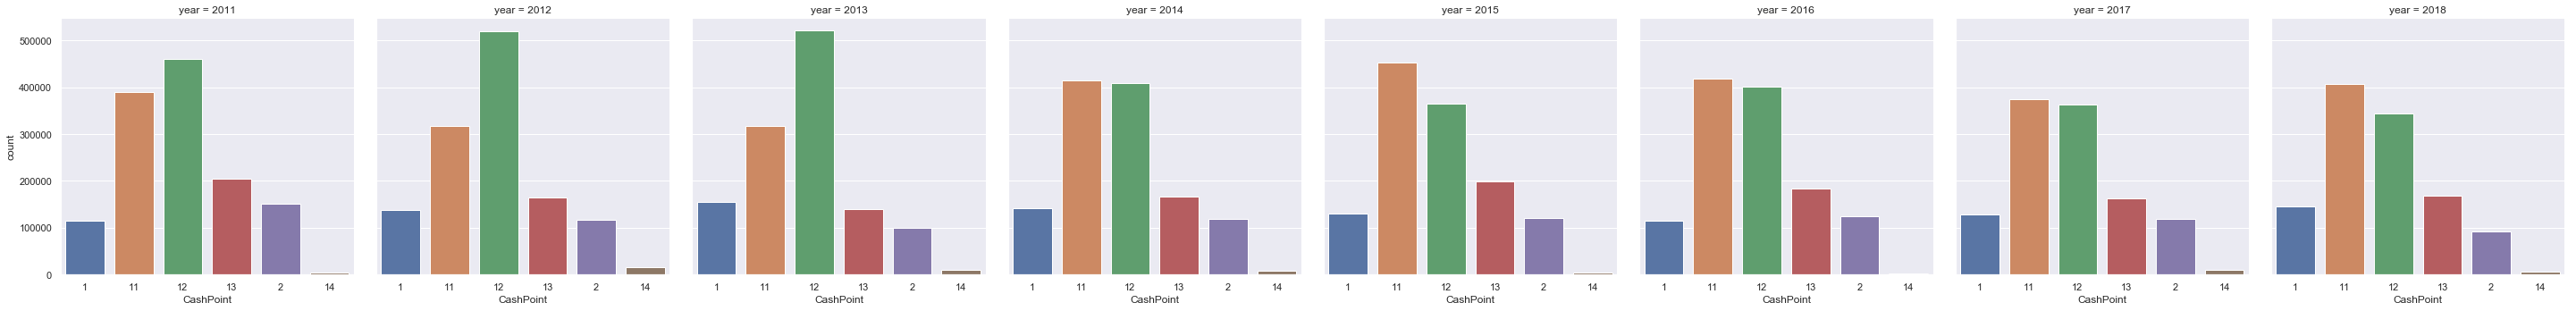

In [16]:
sns.catplot(x="CashPoint",col="year",data=df, kind="count")

There is a big difference between transactions in cashPoints 1,2 (lehel) and 11,12,13,14 (Geising) from which we can understand that guests in Geising are more than employees in lehel but we still ignore the reason behind the small amount of transactions in cashPoint 14 (Geising).

## PayementType count : 

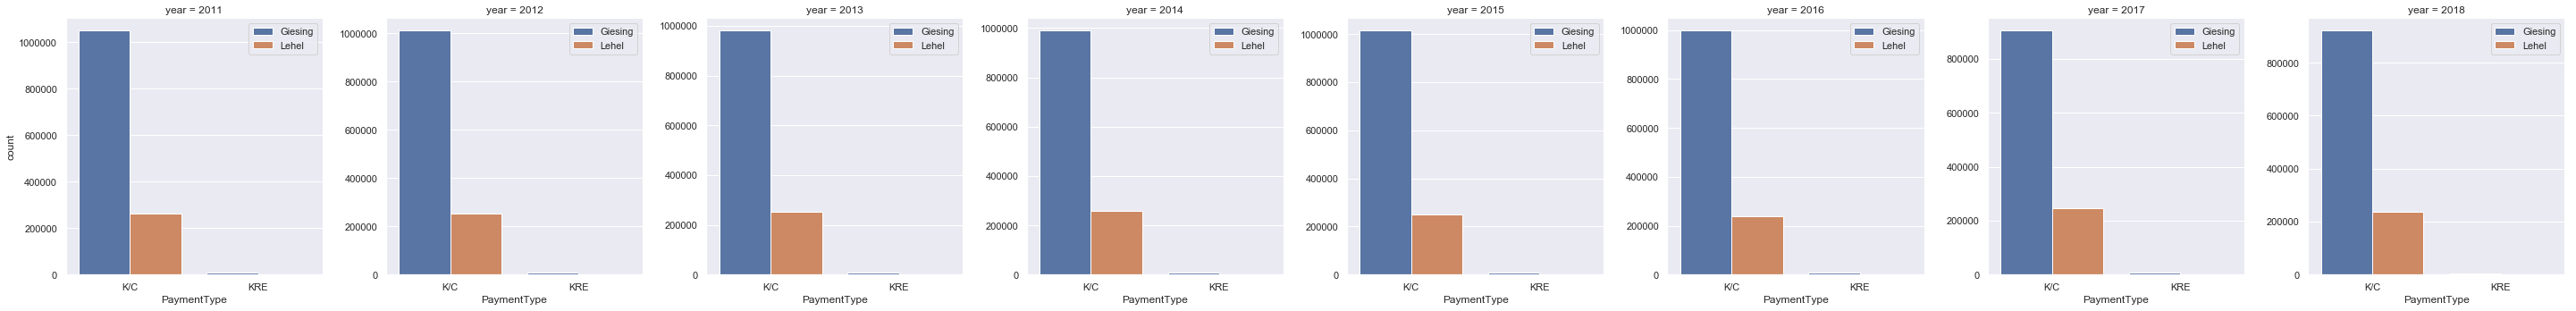

In [18]:
g = sns.catplot(x="PaymentType",col="year",data=df,hue="location",sharey=False ,kind="count",legend=False)
pd.Series(g.fig.get_axes()).apply(lambda x : x.legend());

In [19]:
round(df["PaymentType"].value_counts()*100/len(df),2)

K/C    99.29
KRE     0.71
Name: PaymentType, dtype: float64

99.29% of the transactions are made by CardID

## Firm count : 

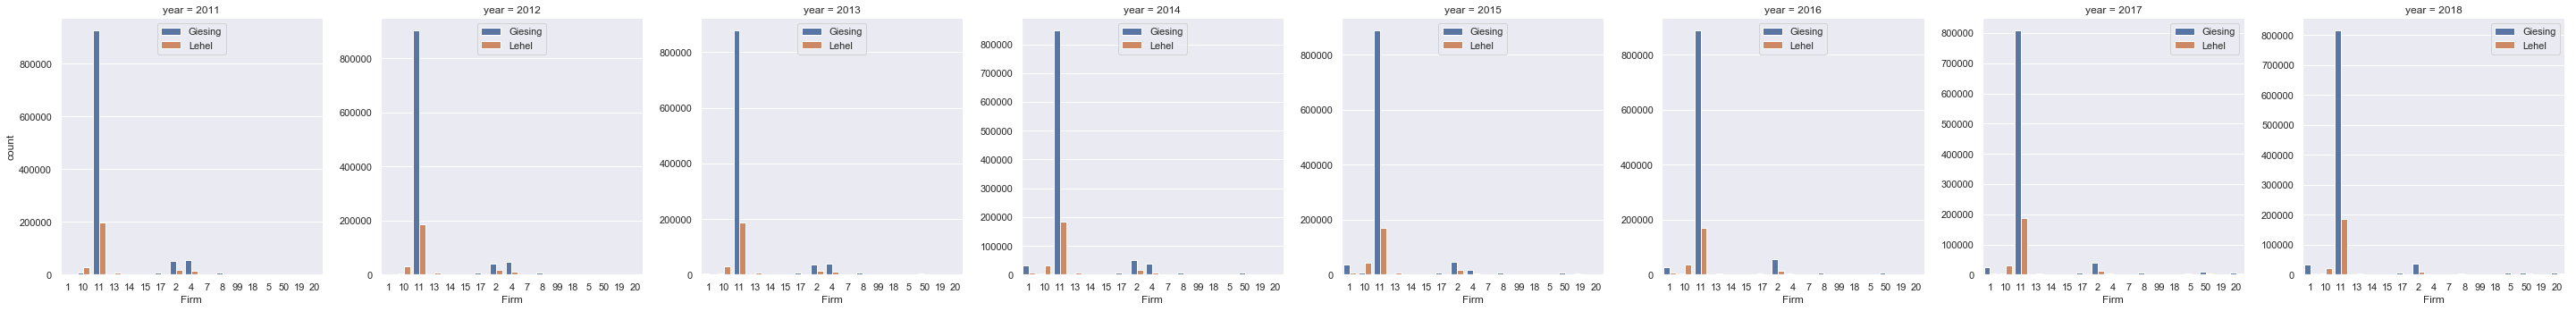

In [20]:
g = sns.catplot(x="Firm",col="year",data=df,hue="location",sharey=False ,kind="count",legend=False)
pd.Series(g.fig.get_axes()).apply(lambda x : x.legend());

In [21]:
percent=round(df["Firm"].value_counts()*100/len(df),2)
percent["11"]+percent["99"]

84.76

FirmCount is observable only if the transaction is made by cardID, Knowing that 99.29% of the transactions are done by cardID we can extract useful information from FirmCount such as the custmers of the canteen are over 84.76% employees and 15.34 % are guests.

## PositionType count : 

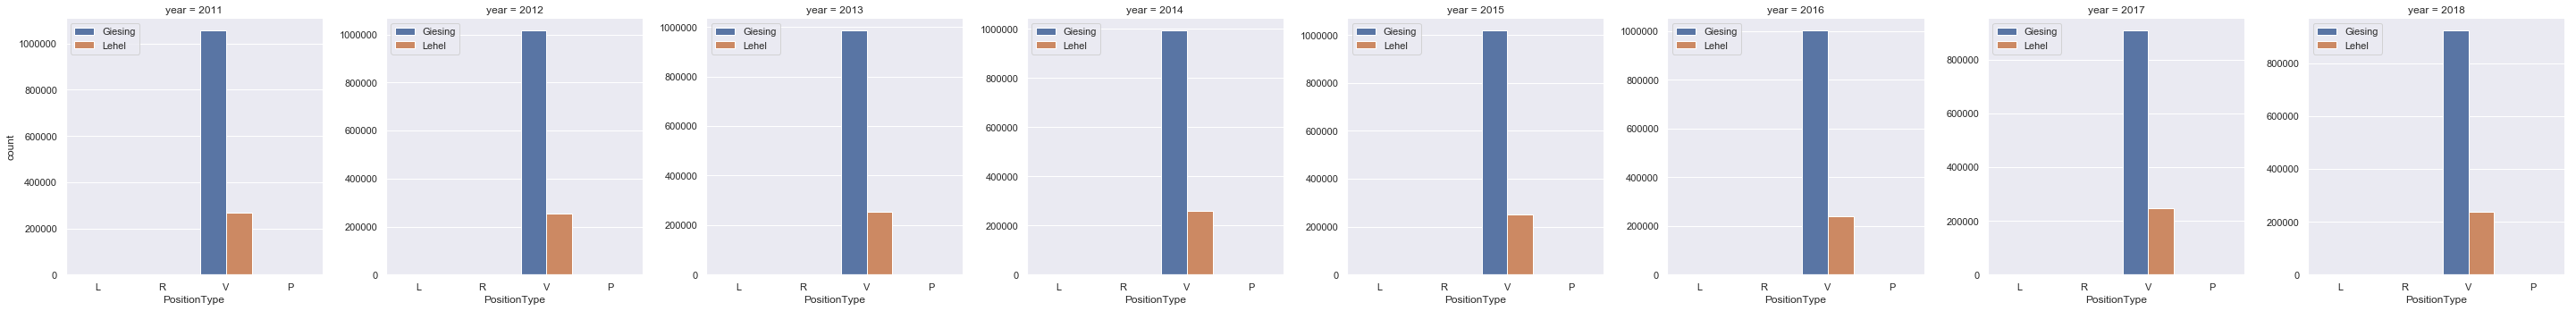

In [22]:
g = sns.catplot(x="PositionType",col="year",data=df,hue="location",sharey=False ,kind="count",legend=False)
pd.Series(g.fig.get_axes()).apply(lambda x : x.legend());

In [23]:
round(df["PositionType"].value_counts()*100/len(df),2)

V    99.74
R     0.13
L     0.13
P     0.00
Name: PositionType, dtype: float64

over 99.74% of the transactions are items sold at the cash register

## Most sold items : 

In [24]:
len(set(df["ItemDescription"]))

399

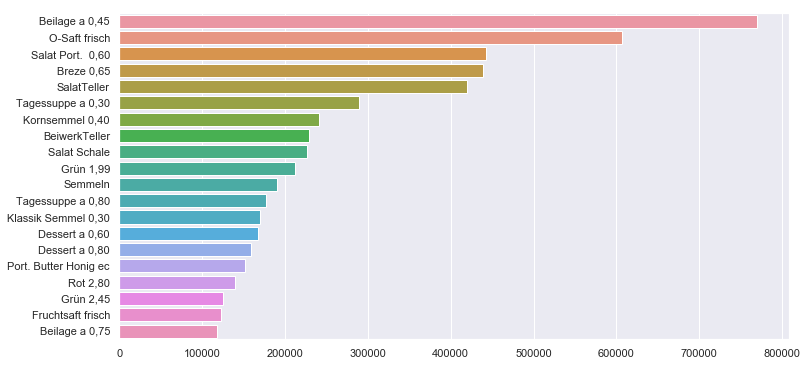

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(y=df["ItemDescription"].value_counts().sort_values(ascending=False).head(20).index.tolist()
            ,x=df["ItemDescription"].value_counts().sort_values(ascending=False).head(20).values)

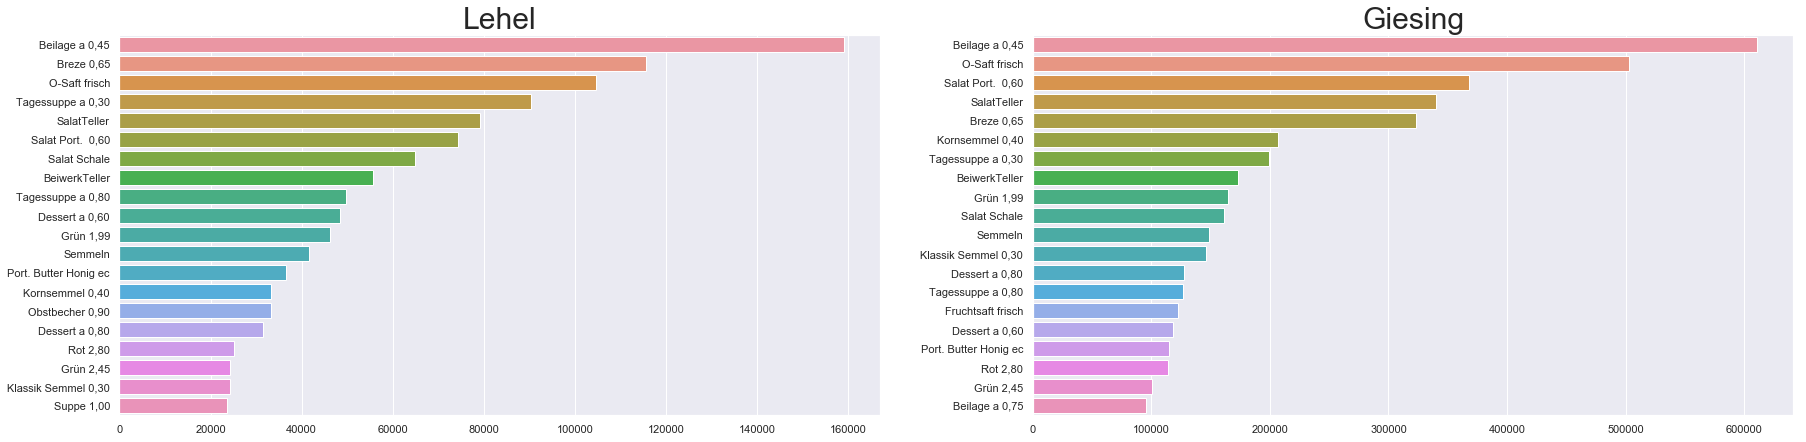

In [26]:
f , axes = plt.subplots(nrows=1, ncols=2,figsize=(30,7))

sns.barplot(y=df[df["location"]=="Lehel"]["ItemDescription"].value_counts().sort_values(ascending=False).head(20).index.tolist()
            ,x=df[df["location"]=="Lehel"]["ItemDescription"].value_counts().sort_values(ascending=False).head(20).values
           ,ax=axes[0])
axes[0].set_title("Lehel",fontsize=30)

sns.barplot(y=df[df["location"]=="Giesing"]["ItemDescription"].value_counts().sort_values(ascending=False).head(20).index.tolist()
            ,x=df[df["location"]=="Giesing"]["ItemDescription"].value_counts().sort_values(ascending=False).head(20).values
           ,ax=axes[1])
axes[1].set_title("Giesing",fontsize=30);

### Per year : 

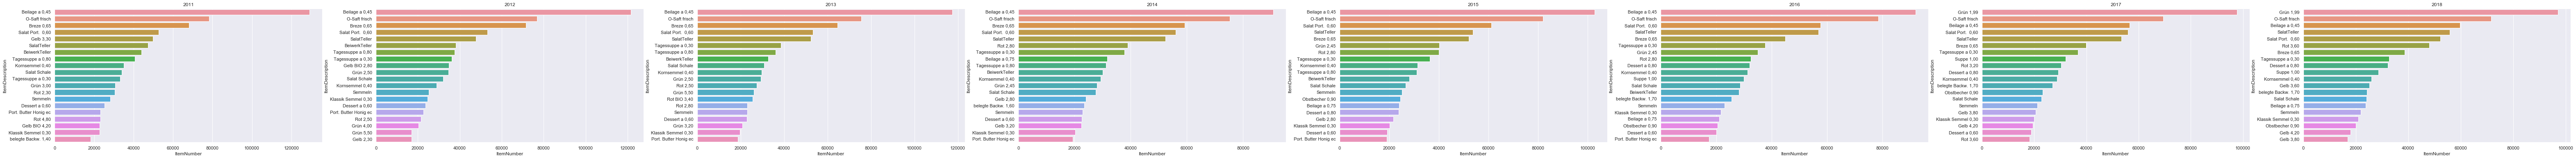

In [27]:
f , axes = plt.subplots(nrows=1, ncols=8,figsize=(110,6))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[df["year"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[df["year"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(20)
               ,ax=axes[l])
    axes[l].set_title(yy)
    l = l + 1

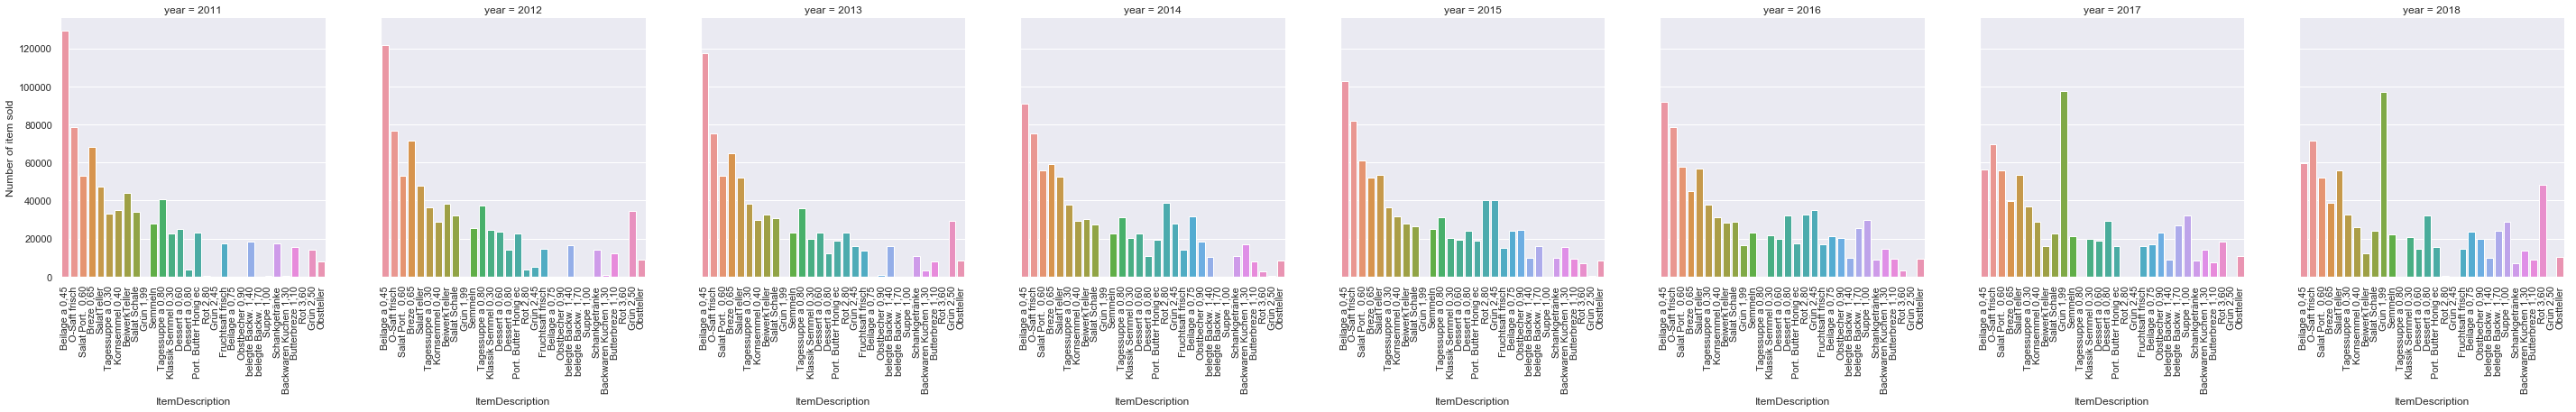

In [28]:
g = sns.catplot(y="ItemNumber"
            ,x="ItemDescription"
            ,col="year"
            ,data=df[["ItemDescription","year","ItemNumber"]].groupby(["ItemDescription","year"]).count().reset_index()
            ,order=df["ItemDescription"].value_counts().sort_values(ascending=False).head(30).index, kind="bar")
g.set_axis_labels("ItemDescription","Number of item sold")
g.set_xticklabels(rotation=90)

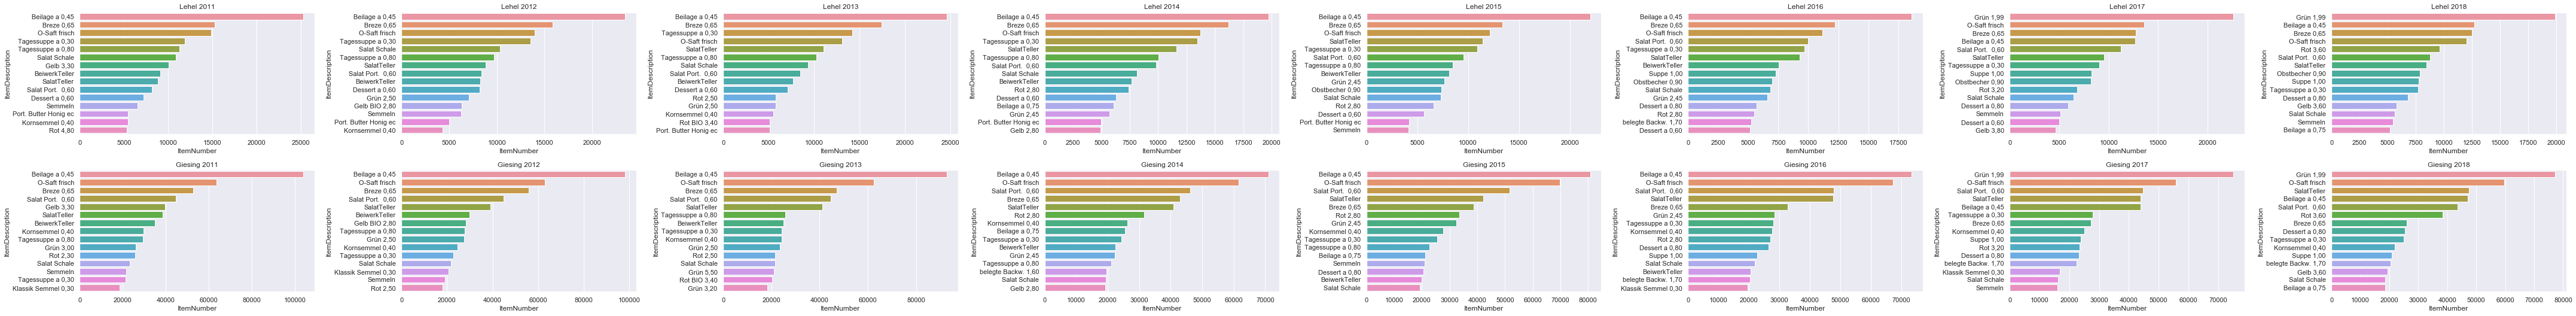

In [29]:
f , axes = plt.subplots(nrows=2, ncols=8,figsize=(60,7.5))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[(df["year"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[(df["year"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

The top 20 sold items over all years are as shown in these plots Beilage a 0.45, O-saft frisch to Beilage a 0.75 and over all years items like Beilage a 0.45, O-saft frisch ,Breze 0.65 , salat port 0.60 and salatTeller were always top 5 best items except for 2011 when Gelb 3.30 was sold more than salatTeller and for 2017 and 2018 when Grun 1.99 was the new top sold item. Also top 5 items over all years always kept their same rank even if they lose their rank it can't be more than one place at worse but there is other items like BeiwerkTeller which was in the 7th place in 2011 and in the 6th place in 2012 and then it kept losing its rank until getting out of the top20 solt items list.
We might explain the high rank of breze (Pretzel) and the semmel (bread roles) by the german food culture which  is considered as a great baking culture, and there are lots of different variations of bread to choose from.

### Per month : 

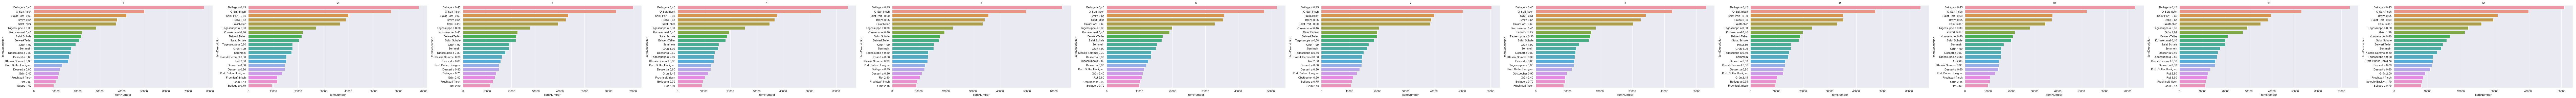

In [30]:
f , axes = plt.subplots(nrows=1, ncols=12,figsize=(180,6))
l = 0
for yy in range(1,13):
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[df["month"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[df["month"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(20)
               ,ax=axes[l])
    axes[l].set_title(yy)
    l = l + 1

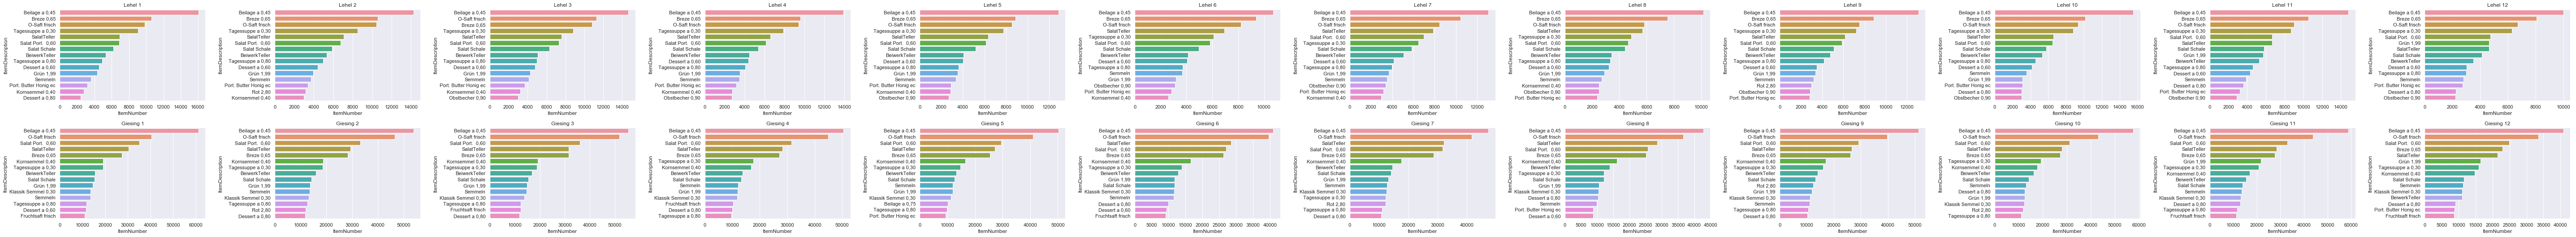

In [31]:
f , axes = plt.subplots(nrows=2, ncols=12,figsize=(80,7.5))
l = 0
for yy in range(1,13):
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["month"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[(df["month"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["month"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[(df["month"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

There is not a big difference in the rank of the top sold items over months which can tell that visually there is not a remarkble influence of the seasons and months on the behavior of the custemers in this canteen

### Per day : 

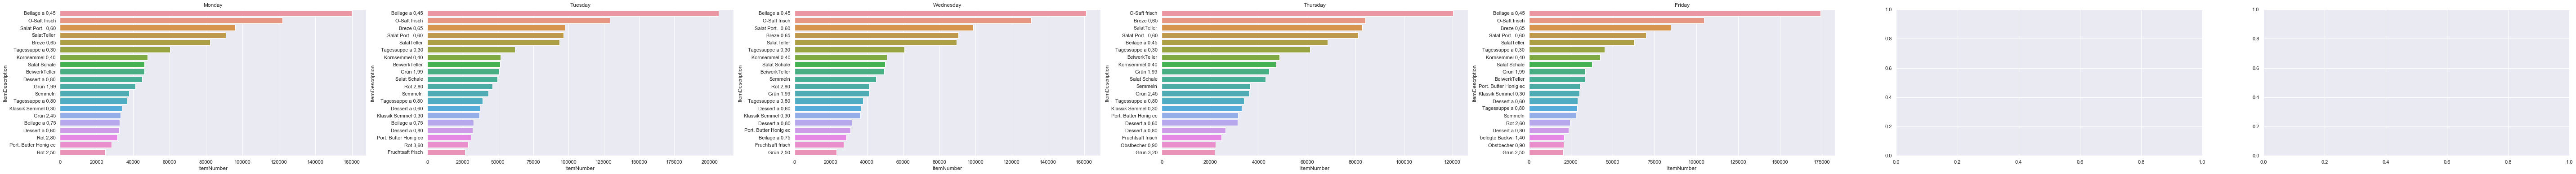

In [32]:
f , axes = plt.subplots(nrows=1, ncols=7,figsize=(100,6))
l = 0
for yy in df.dayoftheweek.unique().sort_values().tolist():
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[df["dayoftheweek"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[df["dayoftheweek"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(20)
               ,ax=axes[l])
    axes[l].set_title(yy)
    l = l + 1

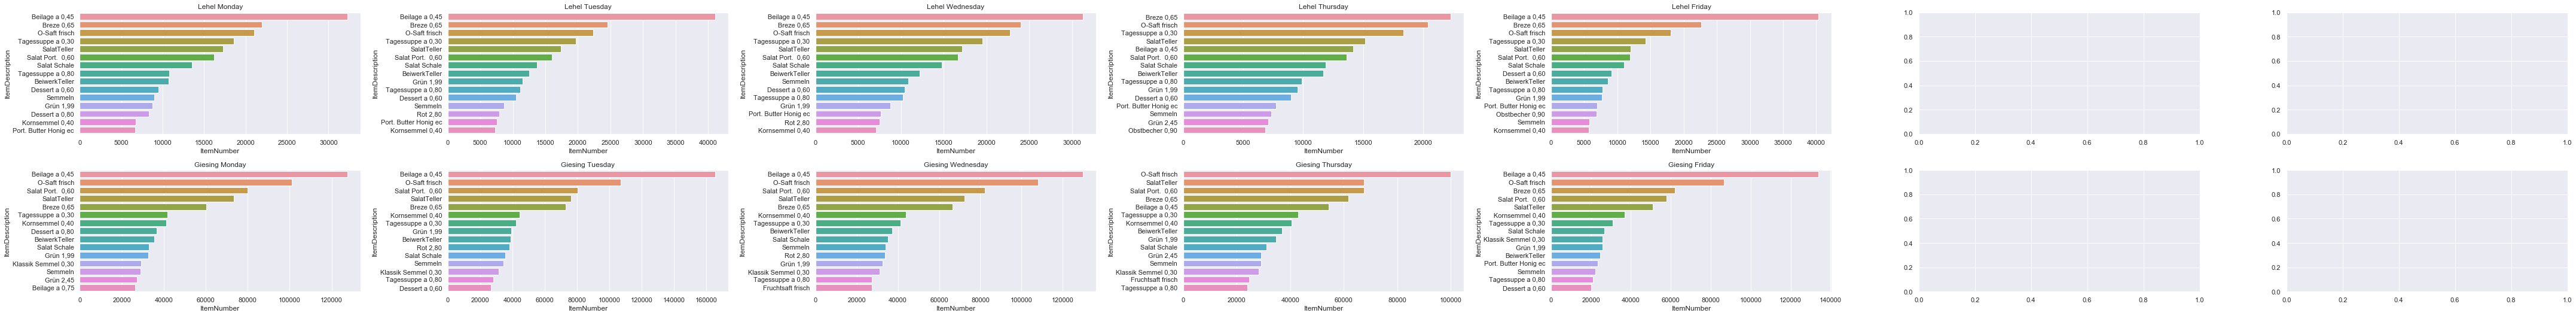

In [33]:
f , axes = plt.subplots(nrows=2, ncols=7,figsize=(60,7.5))
l = 0
for yy in df.dayoftheweek.unique().sort_values().tolist():
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["dayoftheweek"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[(df["dayoftheweek"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["dayoftheweek"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)
               ,order=df[(df["dayoftheweek"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription").count().reset_index().sort_values(by="ItemNumber",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

There are items that are more or least sold than others from a day to another but the top 5 best sold items are always on top of all items over all days.

## Least sold items : 

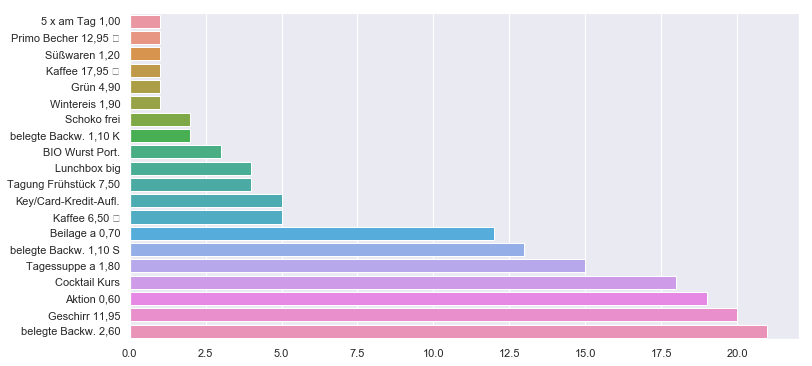

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(y=df["ItemDescription"].value_counts().sort_values(ascending=True).head(20).index.tolist(),x=df["ItemDescription"].value_counts().sort_values(ascending=True).head(20).values)

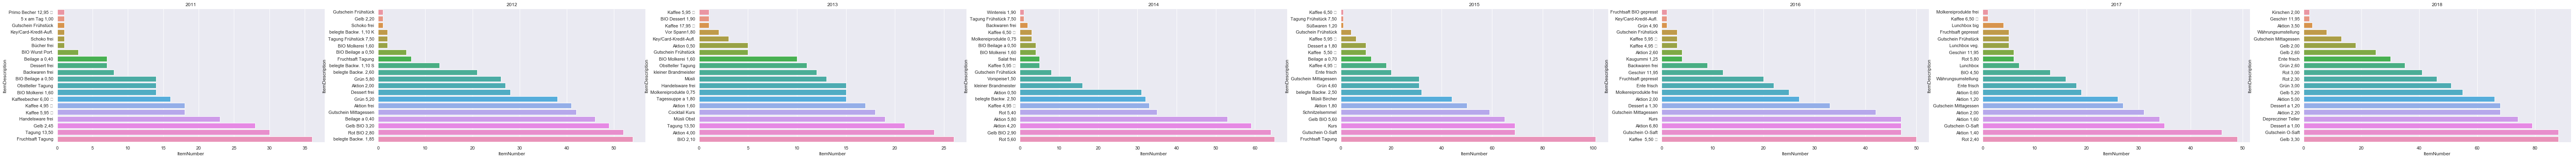

In [35]:
f , axes = plt.subplots(nrows=1, ncols=8,figsize=(110,6))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[df["year"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription",observed=True).count().reset_index().sort_values(by="ItemNumber",ascending=True)
               ,order=df[df["year"] == yy][["ItemDescription","ItemNumber"]].groupby("ItemDescription",observed=True).count().reset_index().sort_values(by="ItemNumber",ascending=True)["ItemDescription"].head(20)
               ,ax=axes[l])
    axes[l].set_title(yy)
    l = l + 1

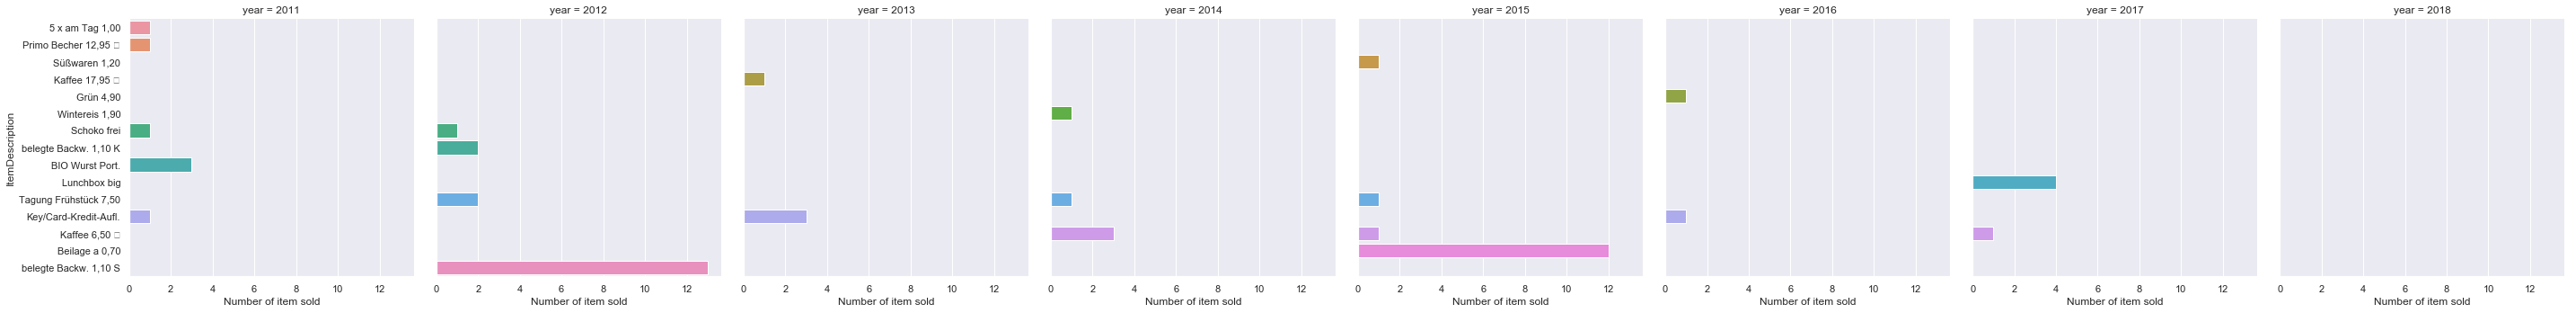

In [36]:
g = sns.catplot(x="ItemNumber"
            ,y="ItemDescription"
            ,col="year"
            ,data=df[["ItemDescription","year","ItemNumber"]].groupby(["ItemDescription","year"]).count().reset_index()
            ,order=df["ItemDescription"].value_counts().sort_values(ascending=True).head(15).index, kind="bar")
g.set_axis_labels("Number of item sold", "ItemDescription")

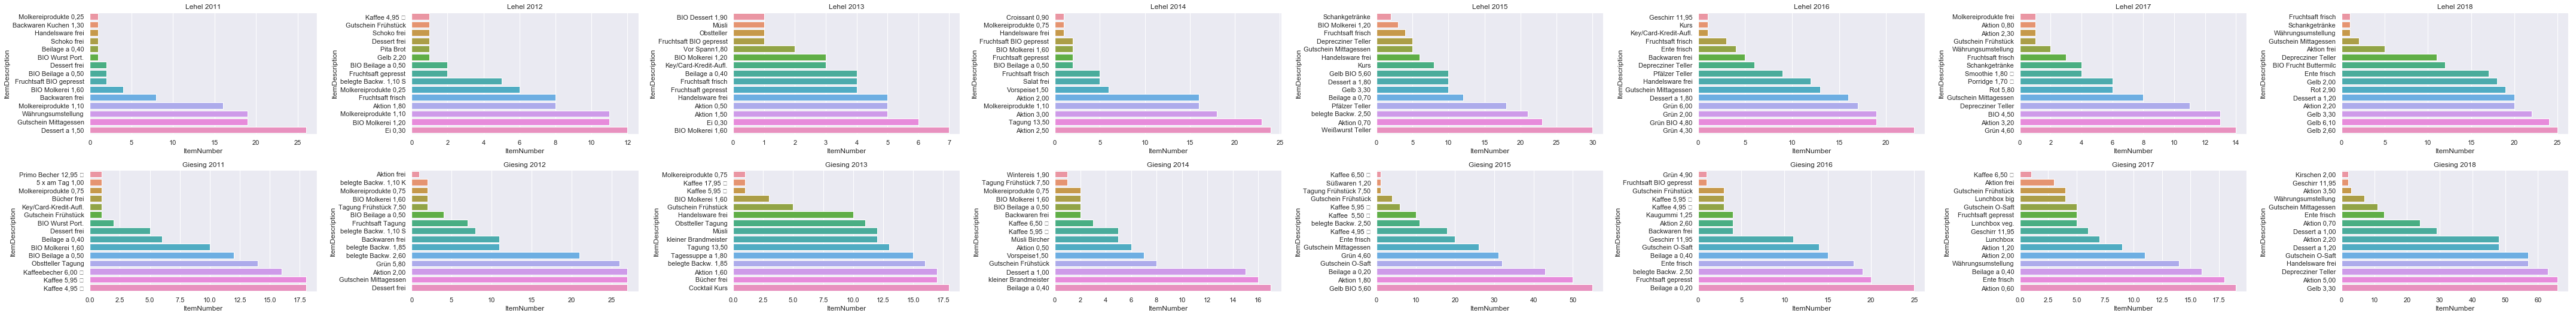

In [37]:
f , axes = plt.subplots(nrows=2, ncols=8,figsize=(60,7.5))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription",observed=True).count().reset_index().sort_values(by="ItemNumber",ascending=True)
               ,order=df[(df["year"] == yy) & (df["location"] == "Lehel")][["ItemDescription","ItemNumber"]].groupby("ItemDescription",observed=True).count().reset_index().sort_values(by="ItemNumber",ascending=True)["ItemDescription"].head(15)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="ItemNumber",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription",observed=True).count().reset_index().sort_values(by="ItemNumber",ascending=True)
               ,order=df[(df["year"] == yy) & (df["location"] == "Giesing")][["ItemDescription","ItemNumber"]].groupby("ItemDescription",observed=True).count().reset_index().sort_values(by="ItemNumber",ascending=True)["ItemDescription"].head(15)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

In [38]:
set(df["SubventionLevel"])

{'100'}

## Items by revenue : 

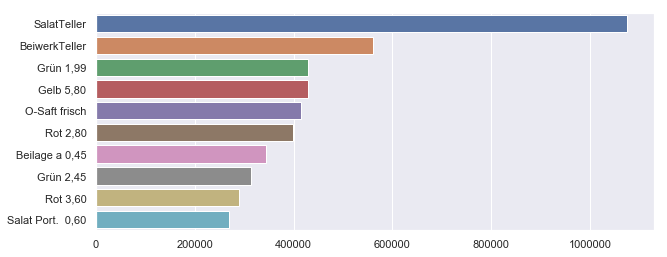

In [39]:
plt.figure(figsize=(10,4))
sns.barplot(y=df[["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().sort_values(by="Revenue",ascending=False).head(10).index.tolist()
            ,x=df[["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True)["Revenue"].sum().sort_values(ascending=False).head(10).values)

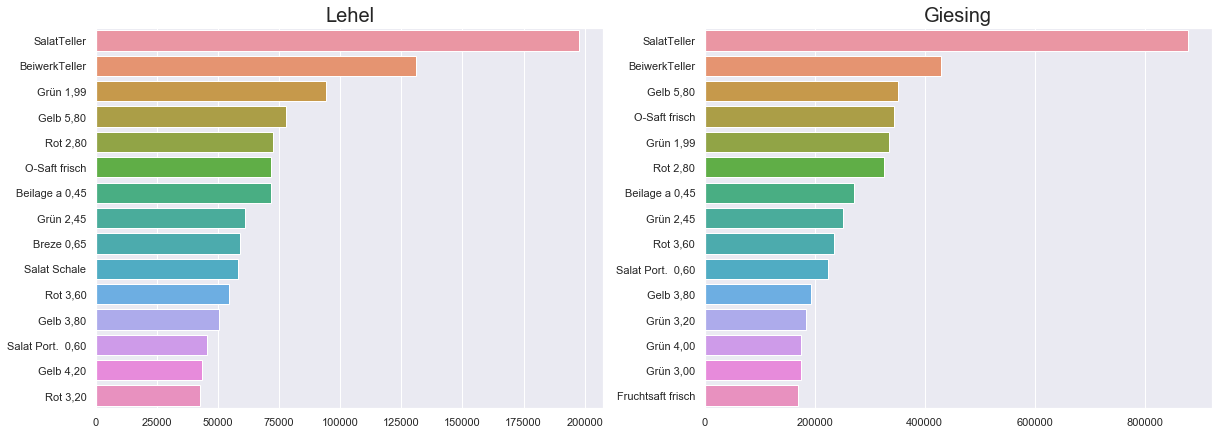

In [40]:
f , axes = plt.subplots(nrows=1, ncols=2,figsize=(20,7))

sns.barplot(y=df[df["location"]=="Lehel"][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().sort_values(by="Revenue",ascending=False).head(15).index.tolist()
            ,x=df[df["location"]=="Lehel"][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True)["Revenue"].sum().sort_values(ascending=False).head(15).values
           ,ax=axes[0])
axes[0].set_title("Lehel",fontsize=20)

sns.barplot(y=df[df["location"]=="Giesing"][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().sort_values(by="Revenue",ascending=False).head(15).index.tolist()
            ,x=df[df["location"]=="Giesing"][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True)["Revenue"].sum().sort_values(ascending=False).head(15).values
           ,ax=axes[1])
axes[1].set_title("Giesing",fontsize=20);

As we can notice from this revenue item barplot, the salatTeller and Beiwerk Teller take to top two items and the the manu Grun(green) 1.99 take position three followed by the menu Gelb( yellow) with the same value about 500000.
We might say as hypothisis that the guest are interested in salads, sides and in the three types of menus which are rot,grun and gelb.

### Per year : 

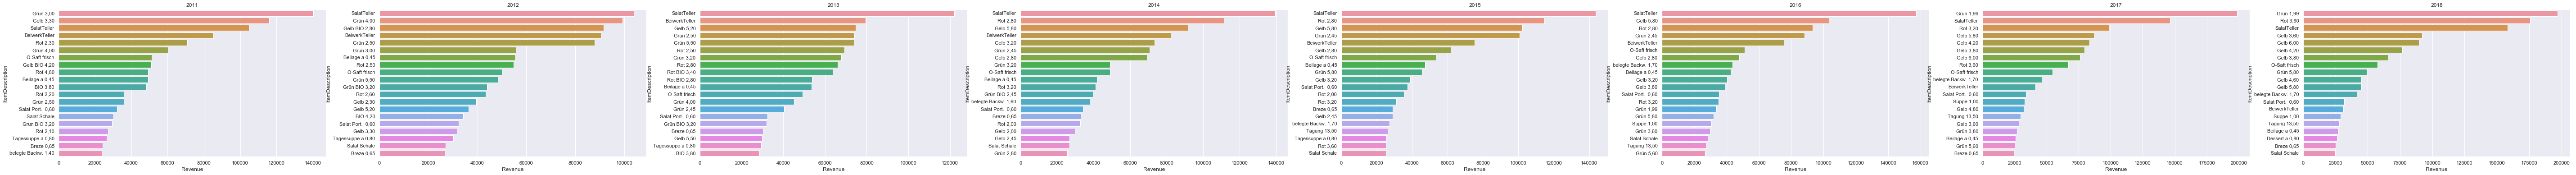

In [41]:
f , axes = plt.subplots(nrows=1, ncols=8,figsize=(100,6))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[df["year"] == yy][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index()
               ,order=df[df["year"] == yy][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index().sort_values(by="Revenue",ascending=False)["ItemDescription"].head(20)
               ,ax=axes[l])
    axes[l].set_title(yy)
    l = l + 1

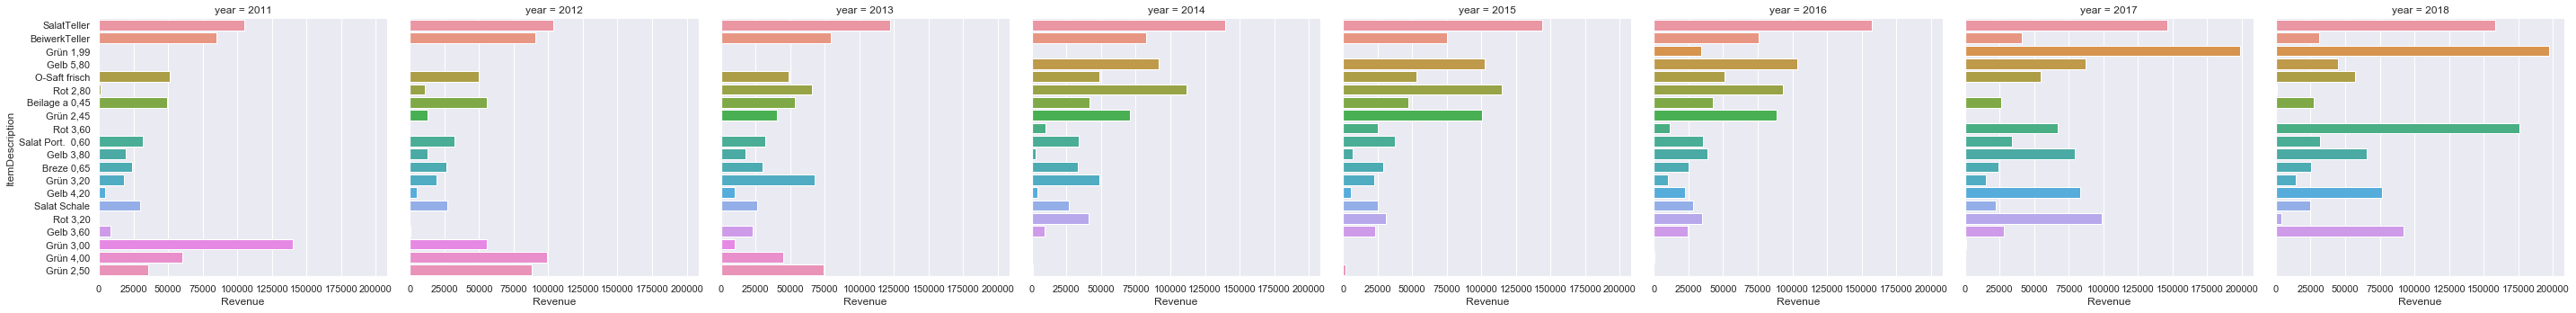

In [42]:
g = sns.catplot(x="Revenue"
            ,y="ItemDescription"
            ,col="year"
            ,data=df[["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).sum().reset_index()
            ,order=df[["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().sort_values(by="Revenue",ascending=False).head(20).index.tolist(), kind="bar")
g.set_axis_labels("Revenue", "ItemDescription")

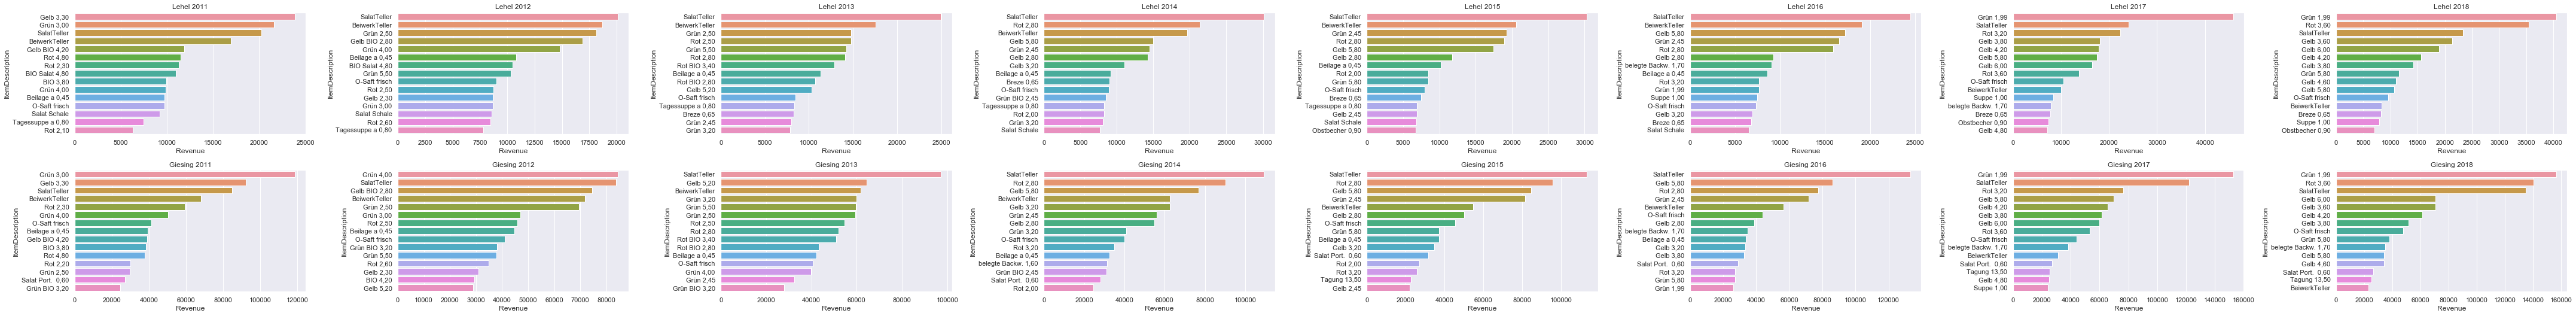

In [43]:
f , axes = plt.subplots(nrows=2, ncols=8,figsize=(60,7.5))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Lehel")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index()
               ,order=df[(df["year"] == yy) & (df["location"] == "Lehel")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index().sort_values(by="Revenue",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Giesing")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index()
               ,order=df[(df["year"] == yy) & (df["location"] == "Giesing")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index().sort_values(by="Revenue",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

### Per month : 

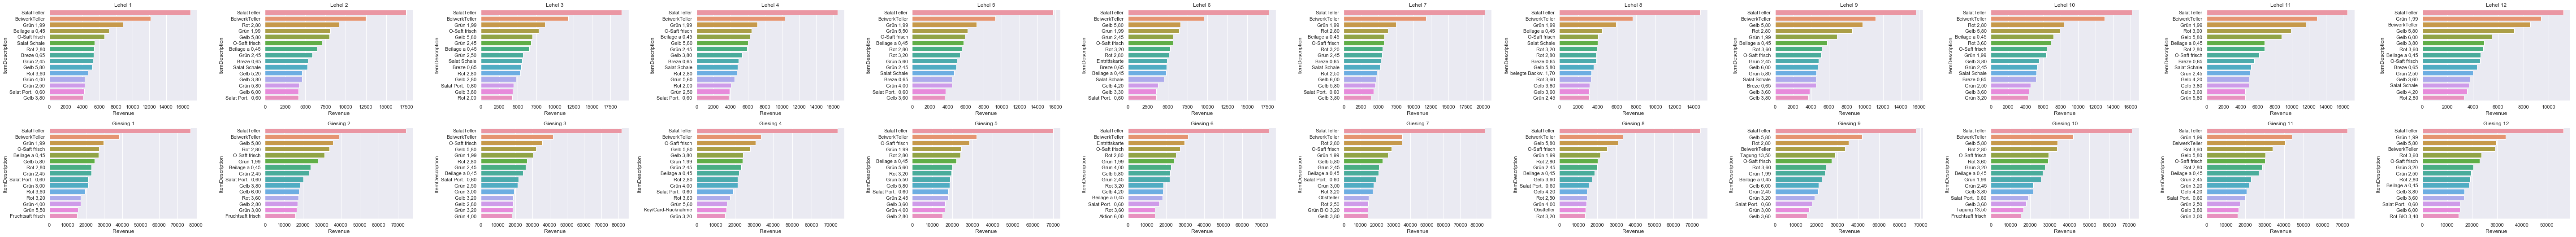

In [44]:
f , axes = plt.subplots(nrows=2, ncols=12,figsize=(80,7.5))
l = 0
for yy in range(1,13):
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["month"] == yy) & (df["location"] == "Lehel")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index()
               ,order=df[(df["month"] == yy) & (df["location"] == "Lehel")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index().sort_values(by="Revenue",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["month"] == yy) & (df["location"] == "Giesing")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index()
               ,order=df[(df["month"] == yy) & (df["location"] == "Giesing")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index().sort_values(by="Revenue",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

### Per day : 

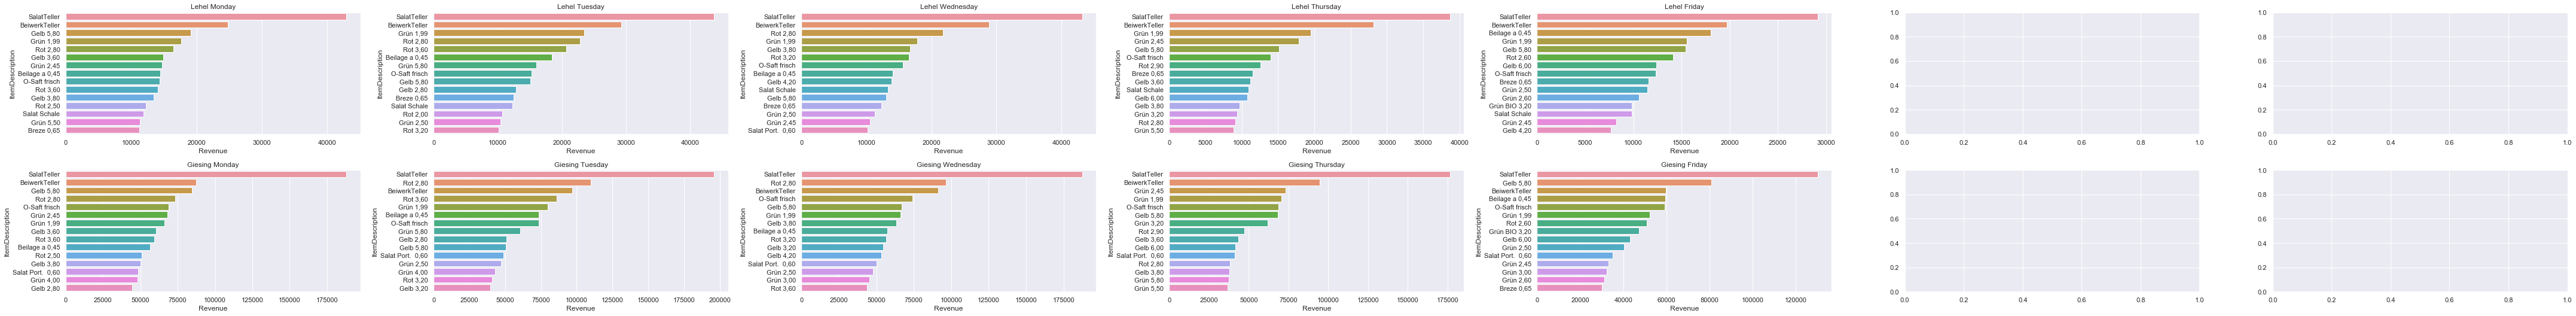

In [45]:
f , axes = plt.subplots(nrows=2, ncols=7,figsize=(60,7.5))
l = 0
for yy in df.dayoftheweek.unique().sort_values().tolist():
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["dayoftheweek"] == yy) & (df["location"] == "Lehel")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index()
               ,order=df[(df["dayoftheweek"] == yy) & (df["location"] == "Lehel")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index().sort_values(by="Revenue",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["dayoftheweek"] == yy) & (df["location"] == "Giesing")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index()
               ,order=df[(df["dayoftheweek"] == yy) & (df["location"] == "Giesing")][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).sum().reset_index().sort_values(by="Revenue",ascending=False)["ItemDescription"].head(15)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

## Most refunded items : 

### Per year : 

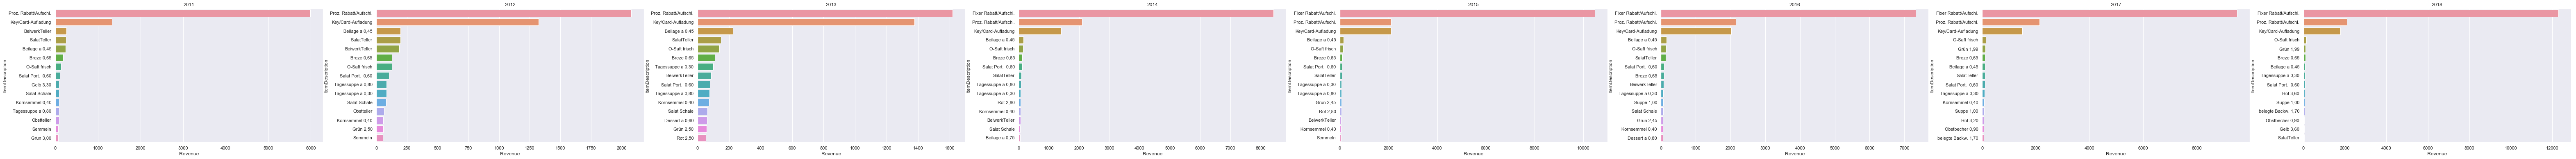

In [46]:
f , axes = plt.subplots(nrows=1, ncols=8,figsize=(110,6))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["year"] == yy) &(df["Revenue"] < 0)][["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index()
               ,order=df[(df["year"] == yy) &(df["Revenue"] < 0)][["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index().ItemDescription.head(15)
               ,ax=axes[l])
    axes[l].set_title(yy)
    l = l + 1

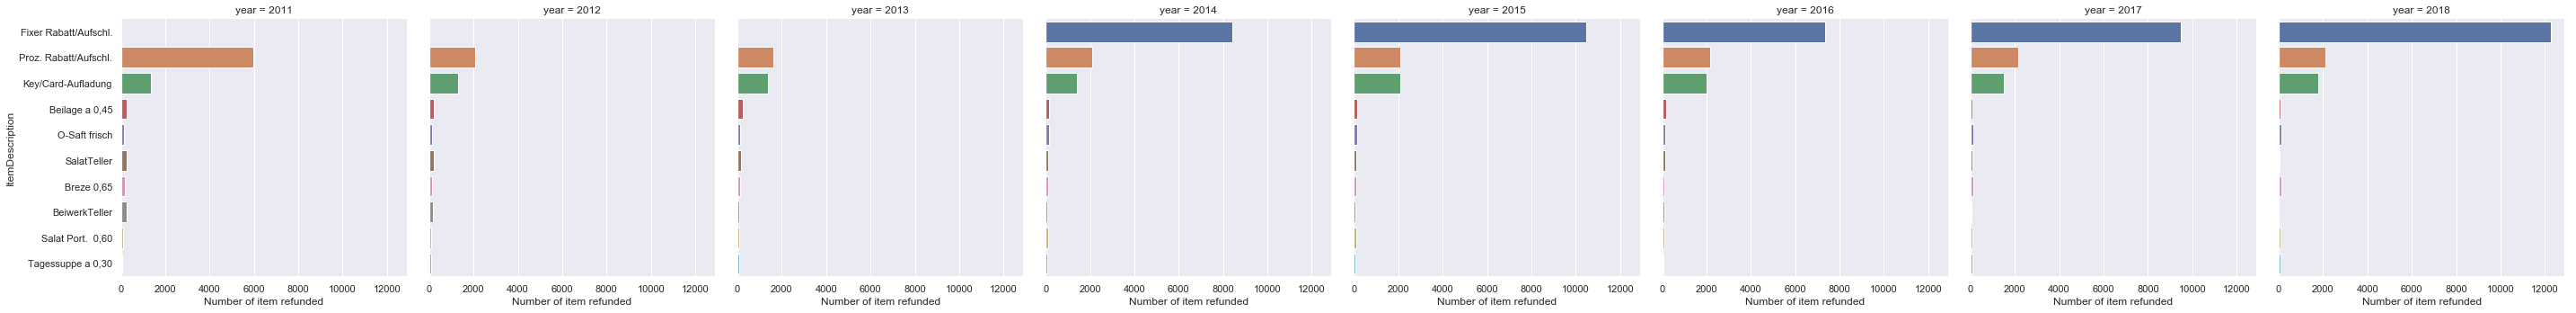

In [47]:
g = sns.catplot(y="ItemDescription"
                ,x="Revenue"
                ,col="year"
                ,order = df[df["Revenue"] < 0][["ItemDescription","Revenue"]].groupby("ItemDescription",observed=True).count().sort_values(by="Revenue",ascending=False).reset_index()["ItemDescription"].head(10)
                ,data=df[df["Revenue"] < 0][["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index()
                ,kind="bar")
g.set_axis_labels("Number of item refunded", "ItemDescription")

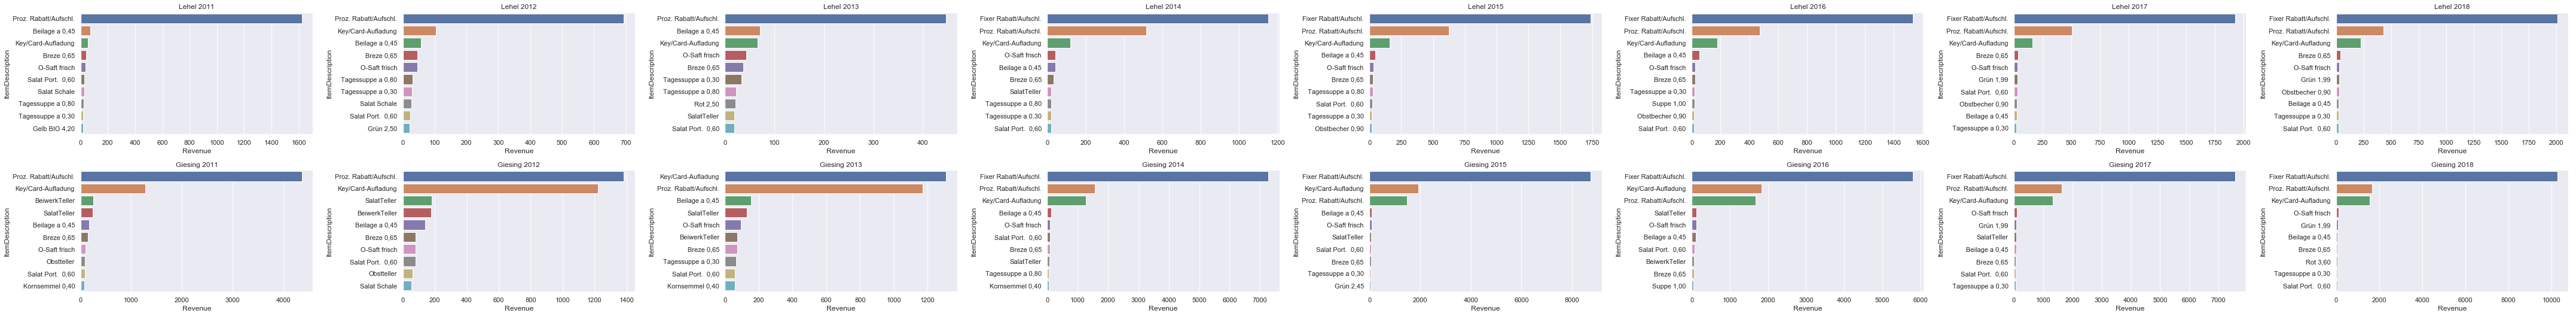

In [48]:
f , axes = plt.subplots(nrows=2, ncols=8,figsize=(60,7.5))
l = 0
for yy in [2011,2012,2013,2014,2015,2016,2017,2018]:
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Lehel") &(df["Revenue"] < 0)][["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index()
               ,order=df[(df["year"] == yy) & (df["location"] == "Lehel") &(df["Revenue"] < 0)][["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index().ItemDescription.head(10)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["year"] == yy) & (df["location"] == "Giesing") &(df["Revenue"] < 0)][["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index()
               ,order=df[(df["year"] == yy) & (df["location"] == "Giesing") &(df["Revenue"] < 0)][["ItemDescription","Revenue","year"]].groupby(["ItemDescription","year"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index().ItemDescription.head(10)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

### Per month : 

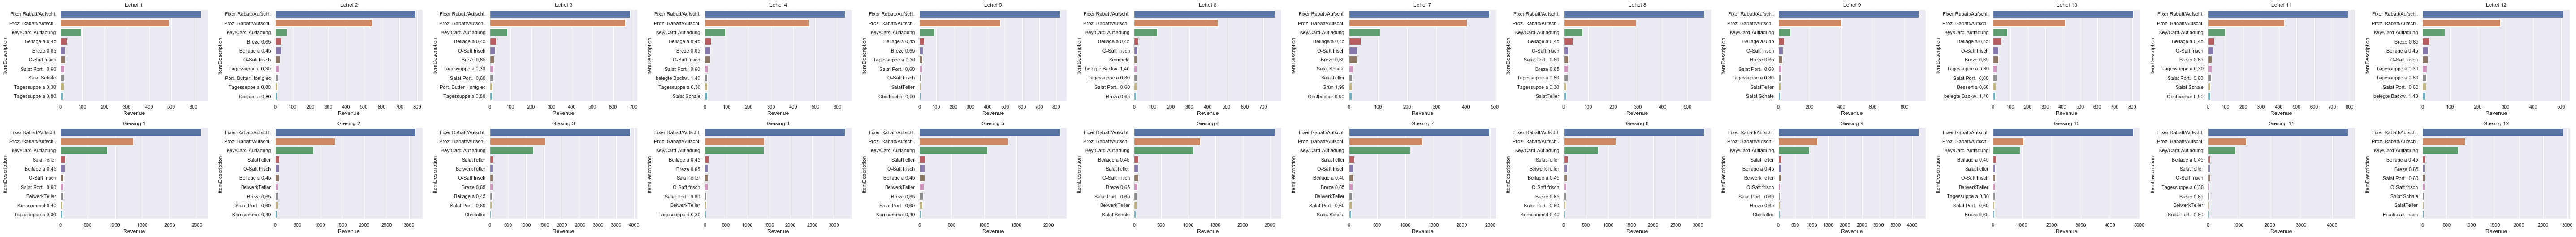

In [49]:
f , axes = plt.subplots(nrows=2, ncols=12,figsize=(80,7.5))
l = 0
for yy in range(1,13):
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["month"] == yy) & (df["location"] == "Lehel") &(df["Revenue"] < 0)][["ItemDescription","Revenue","month"]].groupby(["ItemDescription","month"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index()
               ,order=df[(df["month"] == yy) & (df["location"] == "Lehel") &(df["Revenue"] < 0)][["ItemDescription","Revenue","month"]].groupby(["ItemDescription","month"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index().ItemDescription.head(10)
               ,ax=axes[0][l])
    axes[0][l].set_title("Lehel "+str(yy))
    
    g = sns.barplot(x="Revenue",y="ItemDescription"
                ,data=df[(df["month"] == yy) & (df["location"] == "Giesing") &(df["Revenue"] < 0)][["ItemDescription","Revenue","month"]].groupby(["ItemDescription","month"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index()
               ,order=df[(df["month"] == yy) & (df["location"] == "Giesing") &(df["Revenue"] < 0)][["ItemDescription","Revenue","month"]].groupby(["ItemDescription","month"],observed=True).count().sort_values(by="Revenue",ascending=False).reset_index().ItemDescription.head(10)
               ,ax=axes[1][l])
    axes[1][l].set_title("Giesing "+str(yy))
    
    l = l + 1
    
f.tight_layout()

## Taxes : 

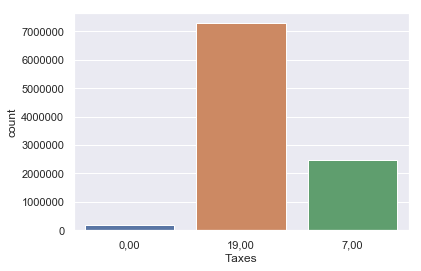

In [50]:
sns.countplot(x="Taxes",data=df)

About 7000000 sold items have 19% taxes and about 2500000 have 7% taxes.

In [51]:
round(df["Taxes"].value_counts()*100/len(df),2)

19,00    73.39
7,00     24.75
0,00      1.85
Name: Taxes, dtype: float64

73.39% of the products taxes are 19%, 24.75% of the product taxes are 24.75% and only 1.85% of the products are free from taxes

## Number of guests : 

In [52]:
df[df.DateTime.dt.date == datetime.date(2016,4,2)].DateTime.dt.strftime("%H").unique()

array([], dtype=object)

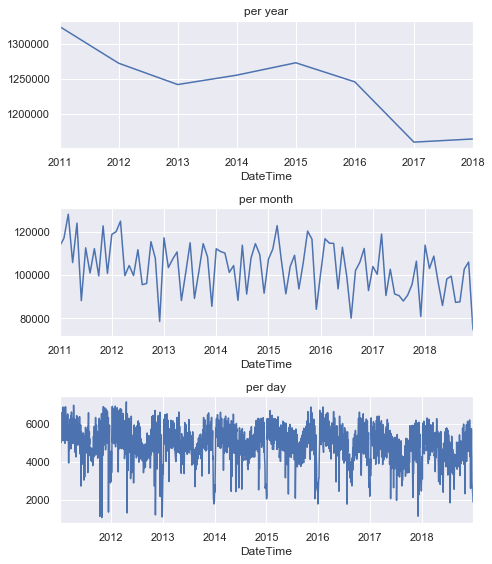

In [53]:
f,axes = plt.subplots(nrows=3,ncols=1,figsize=(7,8))

df["CardID"].groupby(df.DateTime.dt.to_period("Y")).count().plot(ax=axes[0],title="per year")
df["CardID"].groupby(df.DateTime.dt.to_period("M")).count().plot(ax=axes[1],title="per month")
df["CardID"].groupby(df.DateTime.dt.to_period("D")).count().plot(ax=axes[2],title="per day")

f.tight_layout()

In the first graphic of the time series per year, we can see the remarkable decrease in the number of the guests in 2013 and then a massive decrease 2017 where the number become under 120000 guests which stayed stabled. The decrease might also be related the Europeen Economic Crisis.

In the second graph, we can observe a high variablity between the years of 2014 and 2016.

As the third graph, which is a time serie of the number of guest per the days in the years, we observe that there are this sudden regular decreases which are mostly explained by the days in the weekends.

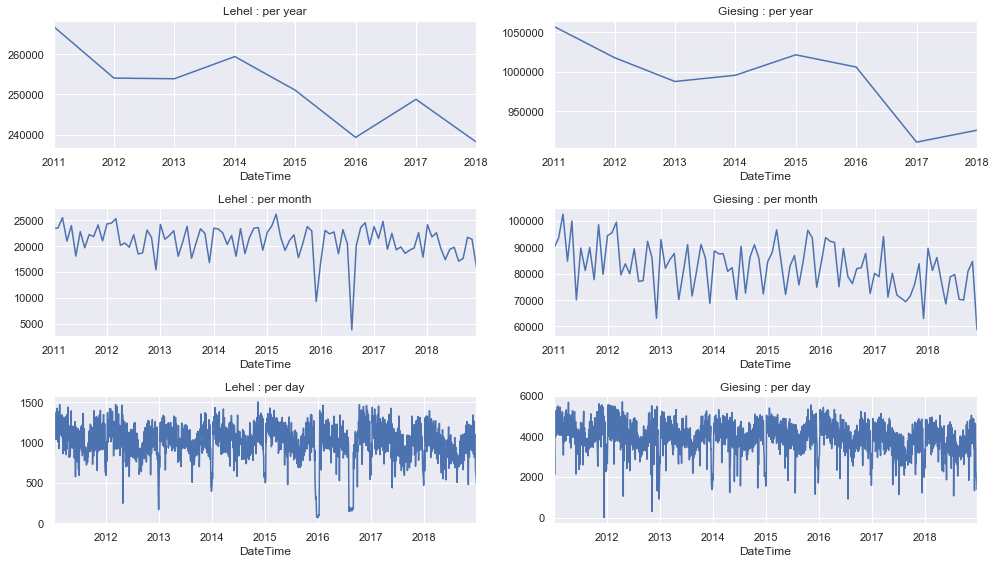

In [54]:
f,axes = plt.subplots(nrows=3,ncols=2,figsize=(14,8))

df[df["location"] == "Lehel"]["CardID"].groupby(df.DateTime.dt.to_period("Y")).count().plot(ax=axes[0][0],title="Lehel : per year")
df[df["location"] == "Lehel"]["CardID"].groupby(df.DateTime.dt.to_period("M")).count().plot(ax=axes[1][0],title="Lehel : per month")
df[df["location"] == "Lehel"]["CardID"].groupby(df.DateTime.dt.to_period("D")).count().plot(ax=axes[2][0],title="Lehel : per day")

df[df["location"] == "Giesing"]["CardID"].groupby(df.DateTime.dt.to_period("Y")).count().plot(ax=axes[0][1],title="Giesing : per year")
df[df["location"] == "Giesing"]["CardID"].groupby(df.DateTime.dt.to_period("M")).count().plot(ax=axes[1][1],title="Giesing : per month")
df[df["location"] == "Giesing"]["CardID"].groupby(df.DateTime.dt.to_period("D")).count().plot(ax=axes[2][1],title="Giesing : per day")

f.tight_layout()

According to the time series graphs of Lehel number of guest, the top number of guest were in 2011 about 270000 guest and it surged in 2014 to reach 260000 and it escalated to 240000 in 2016  then rebound in 2017 to fall again in 2018.

According to the time series graphs of Giesing number of guest, the number of guests are much higher which reached 105000 then slowly start droping to rise again between 2014 and 2015 than escalated in 2017.

Counting each CardID as unique in the same day : 

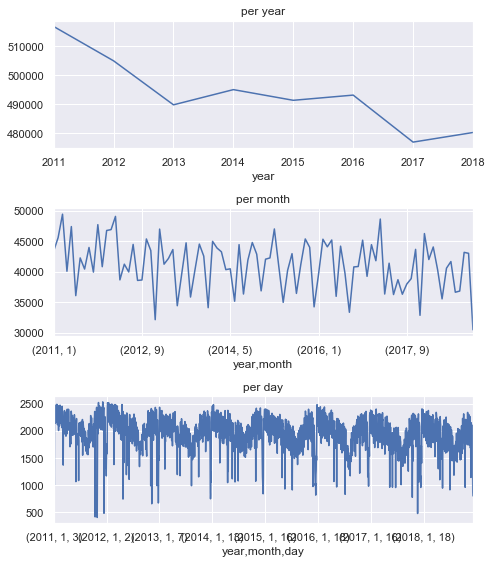

In [55]:
f,axes = plt.subplots(nrows=3,ncols=1,figsize=(7,8))

df[["year","month","day","CardID"]].groupby(["year","month","day"]).nunique().drop(["year","month","day"],axis=1).reset_index().groupby("year").sum()["CardID"].plot(ax=axes[0],title="per year")
df[["year","month","day","CardID"]].groupby([df.DateTime.dt.date,"year","month","day"]).nunique().drop(["year","month","day"],axis=1).reset_index().groupby(["year","month"]).sum()["CardID"].plot(ax=axes[1],title="per month")
df[["year","month","day","CardID"]].groupby(["year","month","day"]).nunique().drop(["year","month","day"],axis=1)["CardID"].plot(ax=axes[2],title="per day")

f.tight_layout()

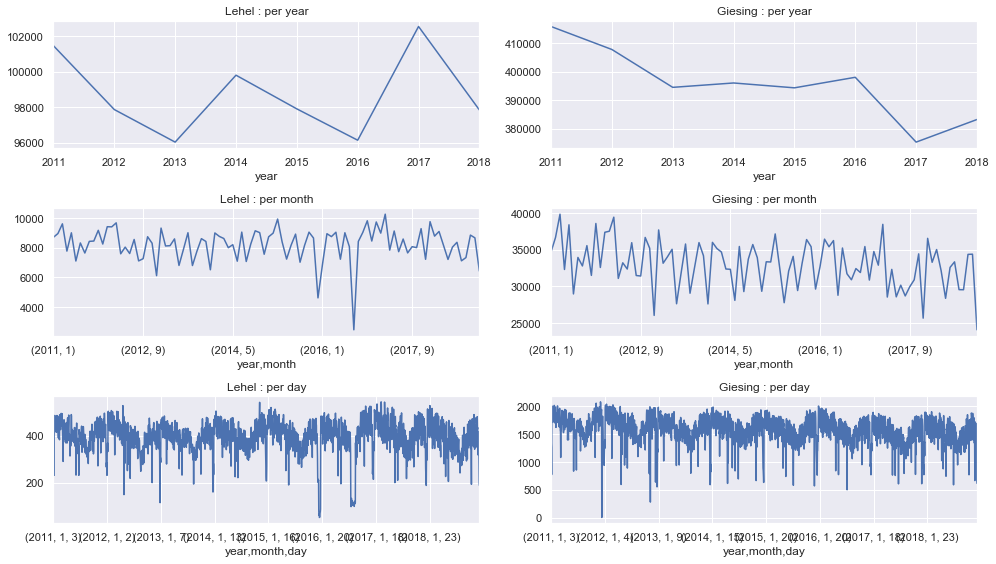

In [56]:
f,axes = plt.subplots(nrows=3,ncols=2,figsize=(14,8))

df[df["location"] == "Lehel"][["year","month","day","CardID"]].groupby(["year","month","day"]).nunique().drop(["year","month","day"],axis=1).reset_index().groupby("year").sum()["CardID"].plot(ax=axes[0][0],title="Lehel : per year")
df[df["location"] == "Lehel"][["year","month","day","CardID"]].groupby([df.DateTime.dt.date,"year","month","day"]).nunique().drop(["year","month","day"],axis=1).reset_index().groupby(["year","month"]).sum()["CardID"].plot(ax=axes[1][0],title="Lehel : per month")
df[df["location"] == "Lehel"][["year","month","day","CardID"]].groupby(["year","month","day"]).nunique().drop(["year","month","day"],axis=1)["CardID"].plot(ax=axes[2][0],title="Lehel : per day")

df[df["location"] == "Giesing"][["year","month","day","CardID"]].groupby(["year","month","day"]).nunique().drop(["year","month","day"],axis=1).reset_index().groupby("year").sum()["CardID"].plot(ax=axes[0][1],title="Giesing : per year")
df[df["location"] == "Giesing"][["year","month","day","CardID"]].groupby([df.DateTime.dt.date,"year","month","day"]).nunique().drop(["year","month","day"],axis=1).reset_index().groupby(["year","month"]).sum()["CardID"].plot(ax=axes[1][1],title="Giesing : per month")
df[df["location"] == "Giesing"][["year","month","day","CardID"]].groupby(["year","month","day"]).nunique().drop(["year","month","day"],axis=1)["CardID"].plot(ax=axes[2][1],title="Giesing : per day")

f.tight_layout()

### Per year : 

The number of guests is decreasing from 2011 to 2018 specially in 2013 by over 80 000 employees and again in 2017.

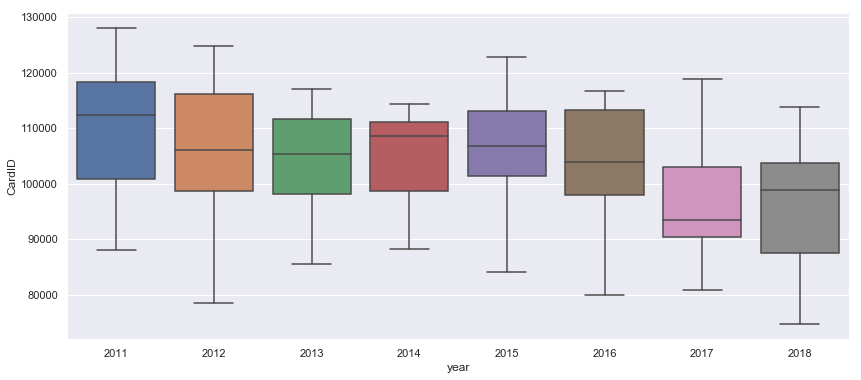

In [57]:
plt.figure(figsize=[14,6])
ax = sns.boxplot(x="year"
                 ,y="CardID"
                 ,data=df[["year","month","CardID"]].groupby(["year","month"]).count().reset_index())

The median of the boxplots during the years are similar, this means that there is a certain periodicity. we can conclude that there is a low variability in the number of guests .

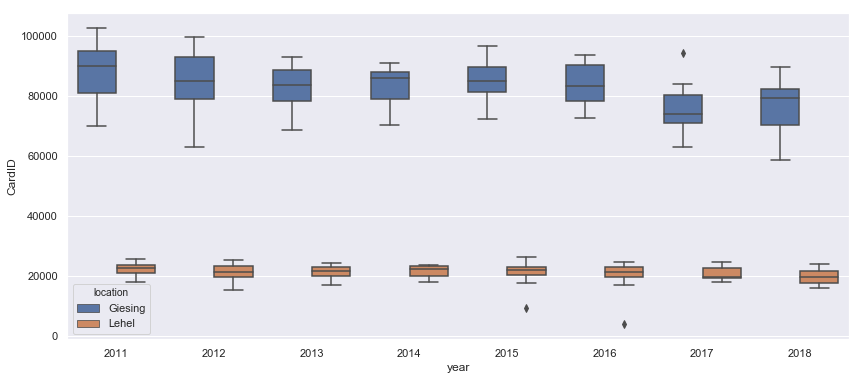

In [58]:
plt.figure(figsize=[14,6])
ax = sns.boxplot(x="year"
                 ,y="CardID"
                 ,data=df[["year","month","location","CardID"]].groupby(["location","year","month"]).count().reset_index()
                ,hue="location")

The number of guests as we see here are always higher is Giesing than Lehel.

### Per months over all years

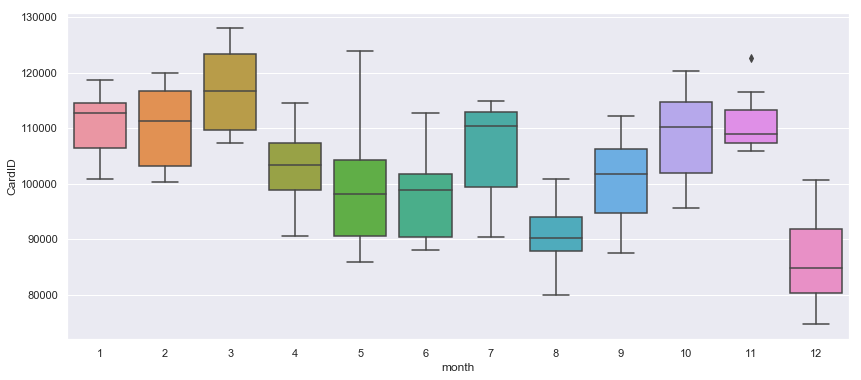

In [59]:
plt.figure(figsize=[14,6])
ax = sns.boxplot(x="month"
                 ,y="CardID"
                 ,data=df[["year","month","CardID"]].groupby(["year","month"]).count().reset_index())

We can notice that Novembre is the most croweded month by guests by a median that is between 110000 and 120000 followed by October that also reachs as a maximum number of guests over 120000. December is lowest one in number of guest which might be explained by the New years Eve vaccation. August is also low but that's because most canteens are closed since most employees go on vaccation. The average number of guests in the rest of the months of the year are between 95000 and 115000. we can conclude that there is a certain variablity of number of guests .

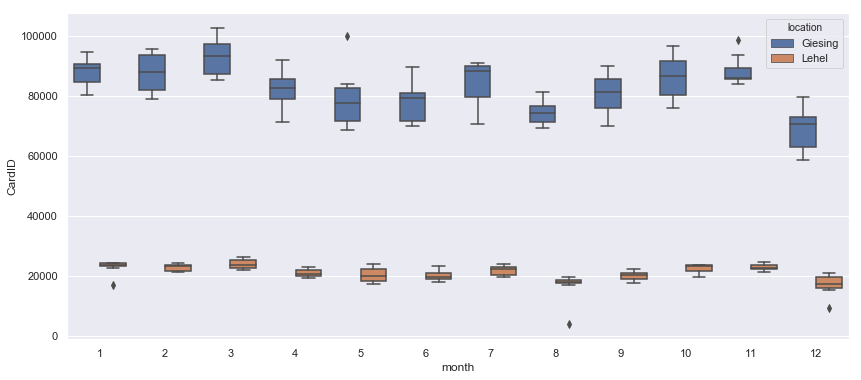

In [60]:
plt.figure(figsize=[14,6])
ax = sns.boxplot(x="month"
                 ,y="CardID"
                 ,data=df[["year","month","CardID","location"]].groupby(["location","year","month"]).count().reset_index()
                ,hue="location")

The number of guests in december is low compared to other months in Giesing and Lehel.

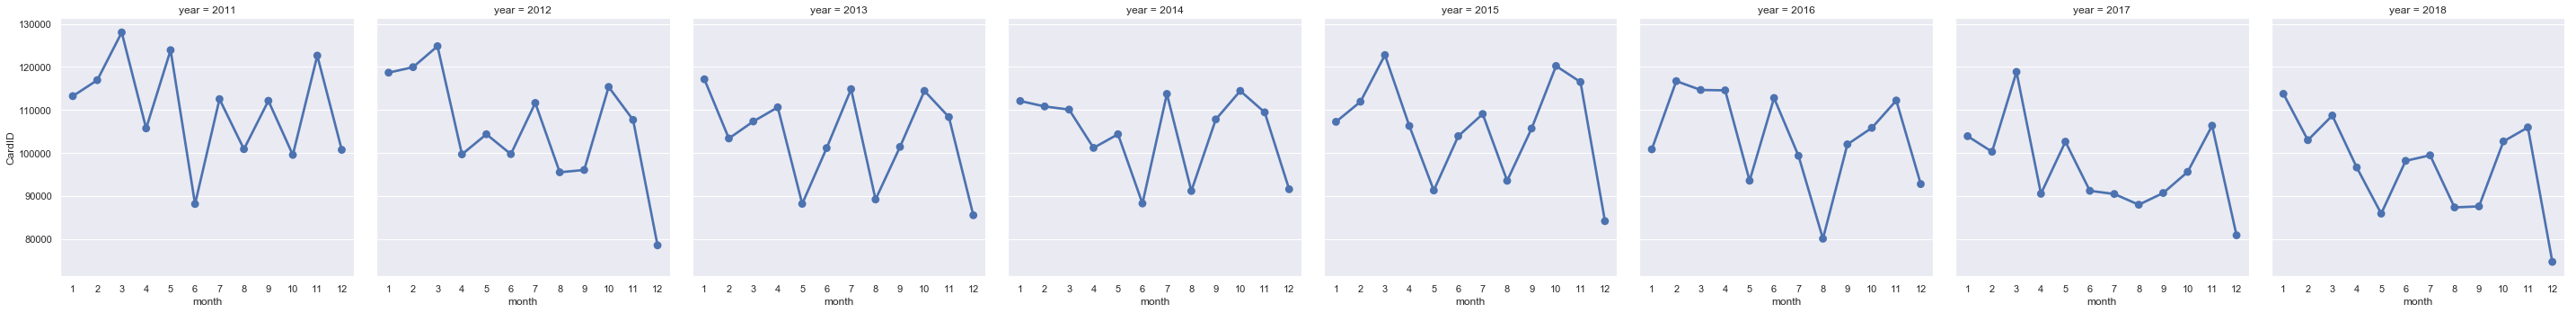

In [61]:
sns.catplot(data=df[["year","month","CardID"]].groupby(["year","month"]).count().reset_index()
           ,x="month"
           ,y="CardID"
           ,col="year",kind="point")

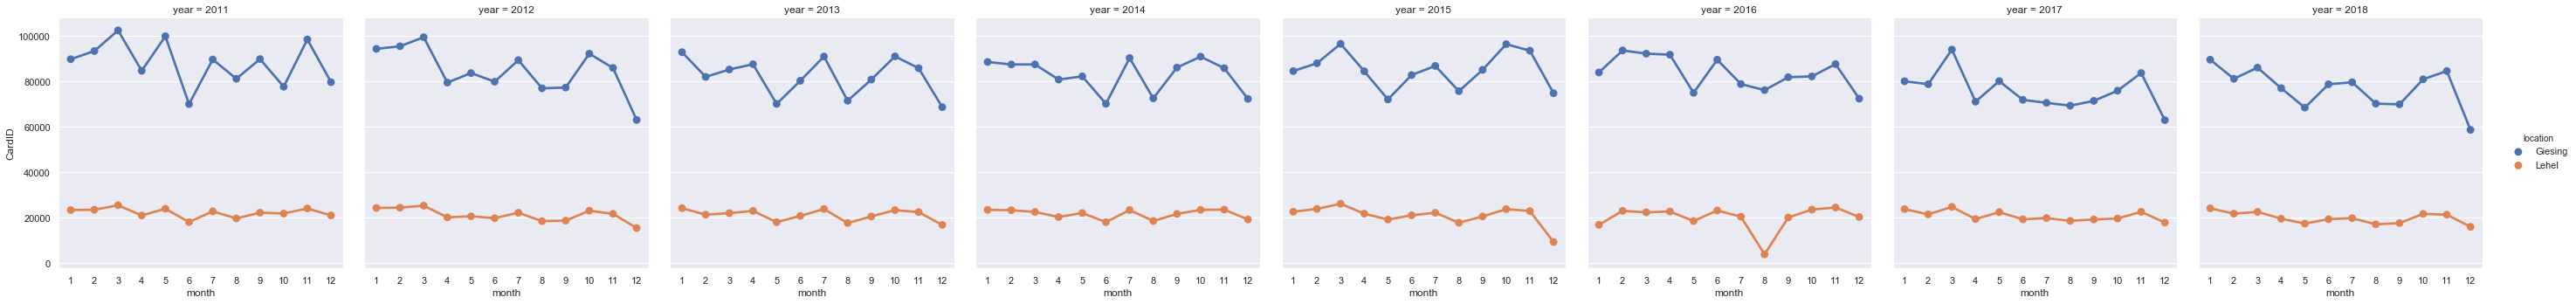

In [62]:
g = sns.catplot(data=df[["year","month","CardID","location"]].groupby(["location","year","month"]).count().reset_index()
           ,x="month"
           ,y="CardID"
           ,col="year"
            ,hue="location"
            ,kind="point")

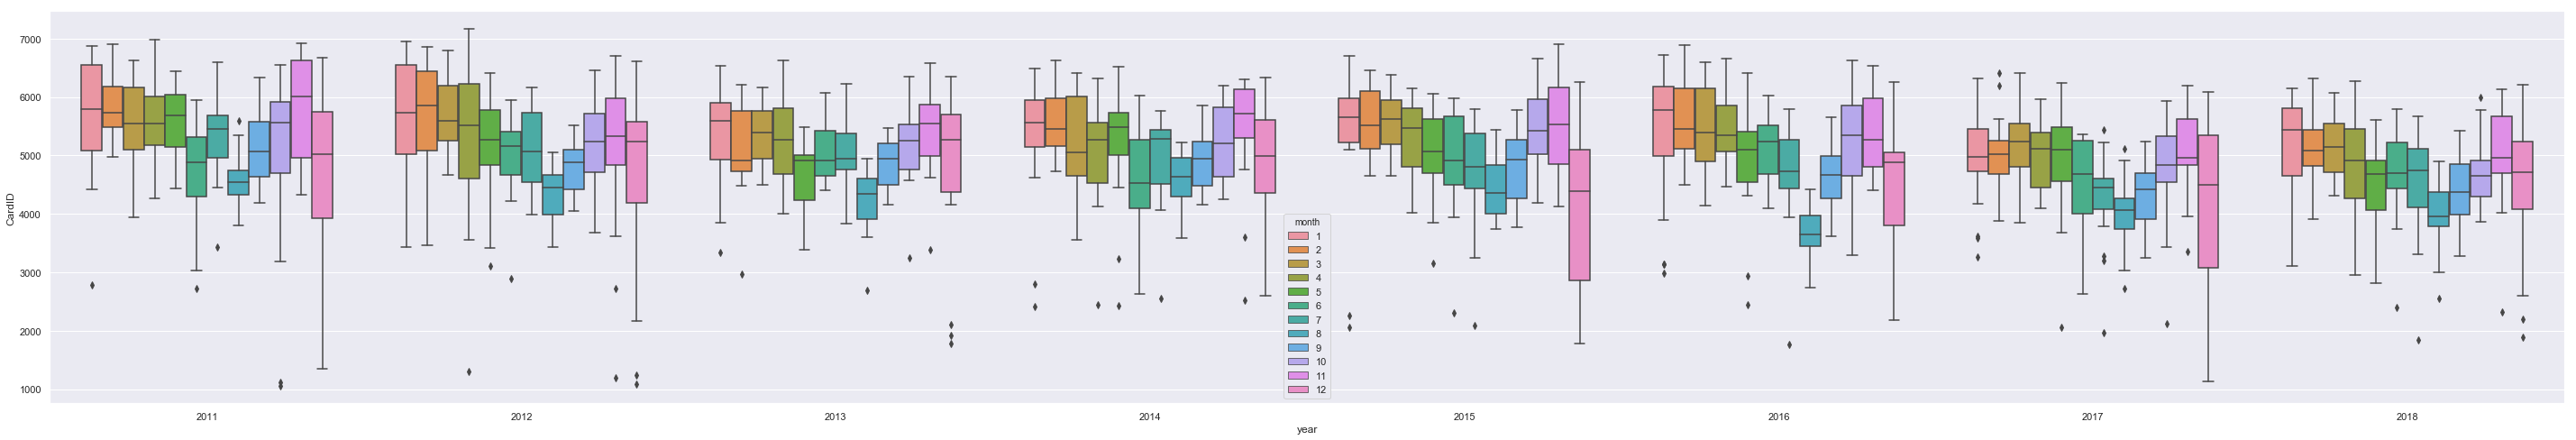

In [63]:
plt.figure(figsize=[50,8])
ax = sns.boxplot(x="year"
                 ,y="CardID"
                 ,hue="month"
                 ,data=df[["year","month","day","CardID"]].groupby(["year","month","day"]).count().reset_index())

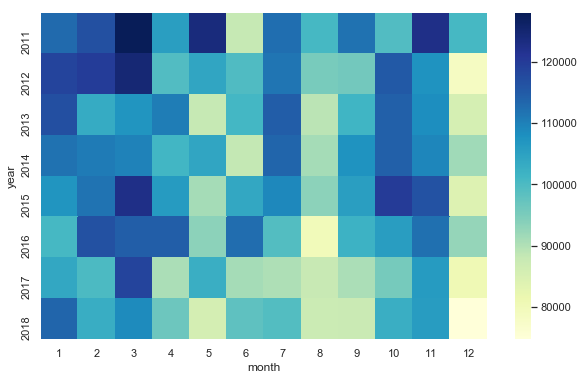

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(values="CardID",index="year",columns="month",aggfunc="count"), cmap="YlGnBu")

The matrix where we have as colomn the year and as row the month the number of guests and it's very obvious that the density is pretty much lower in 2017 and 2018 comparing to the previous years and december is caracterized by a slow density of customers in every year, which matches our previous analysis.

### Per day of weeks : 

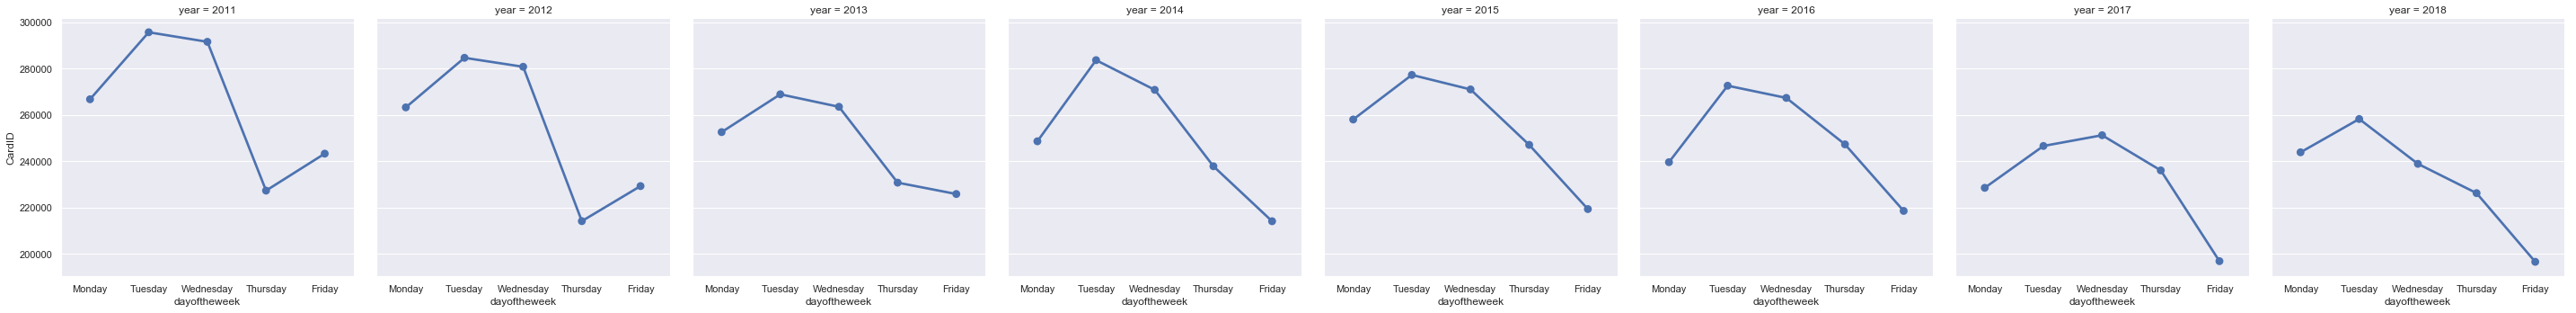

In [65]:
sns.catplot(data=df[["year","CardID","dayoftheweek"]].groupby(["year","dayoftheweek"]).count().reset_index()
           ,x="dayoftheweek"
           ,y="CardID"
           ,col="year",kind="point")

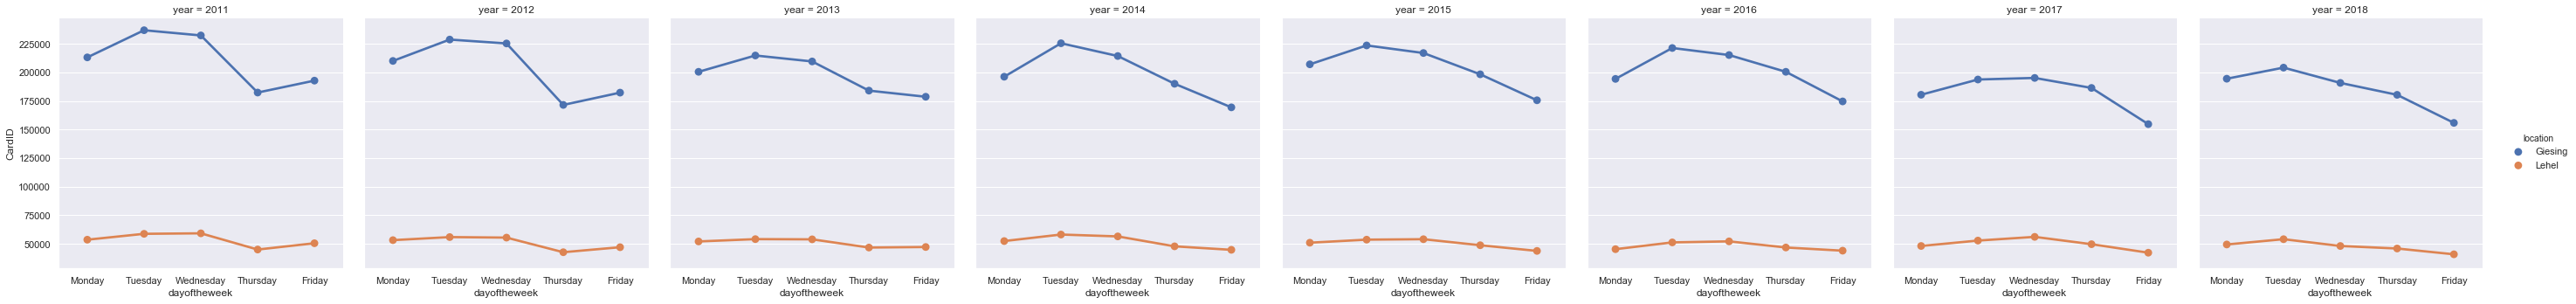

In [66]:
sns.catplot(data=df[["year","CardID","dayoftheweek","location"]].groupby(["location","year","dayoftheweek"]).count().reset_index()
           ,x="dayoftheweek"
           ,y="CardID"
           ,col="year"
            ,hue="location",kind="point")

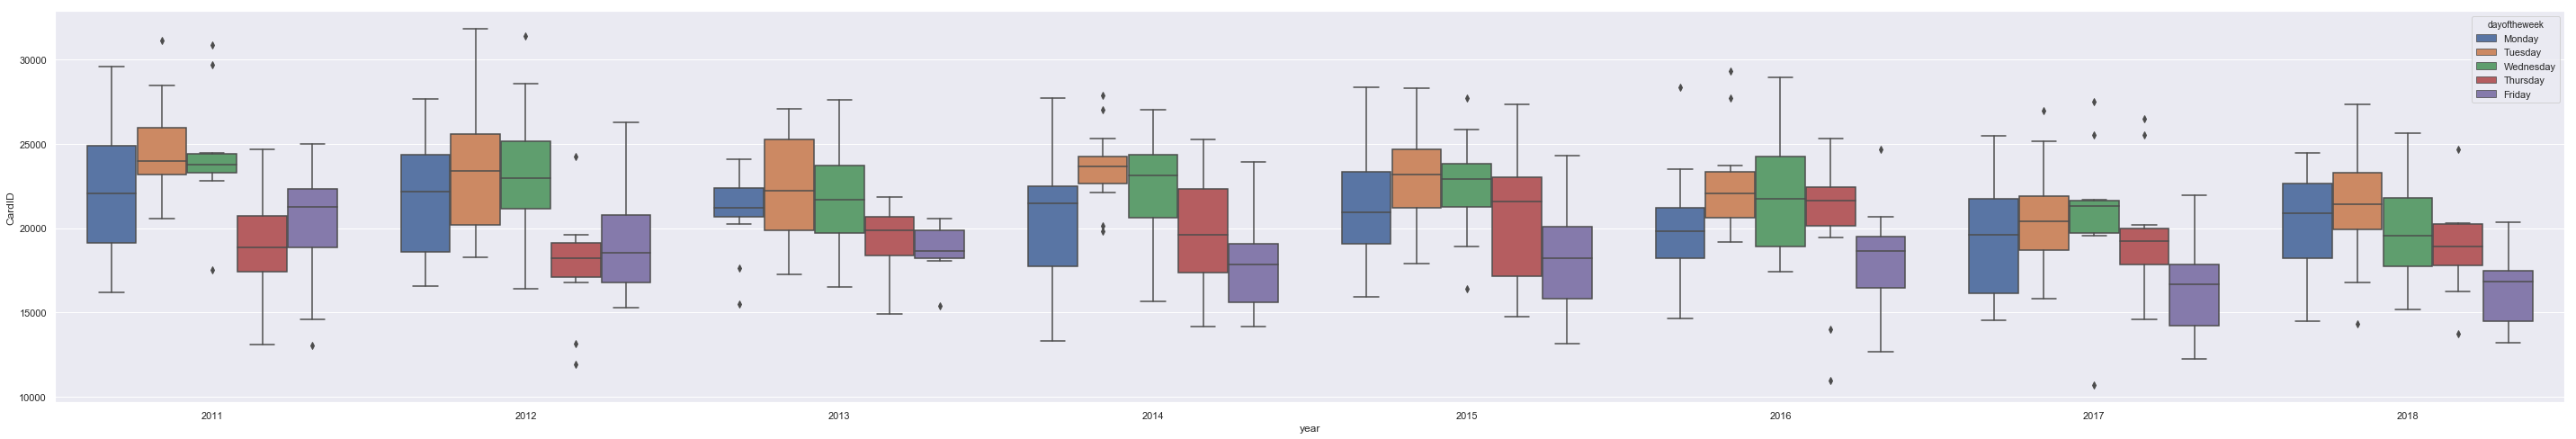

In [67]:
plt.figure(figsize=[50,8])
ax = sns.boxplot(x="year"
                 ,y="CardID"
                 ,hue="dayoftheweek"
                 ,data=df[["year","month","dayoftheweek","CardID"]].groupby(["year","month","dayoftheweek"]).count().reset_index())

## Revenue : 

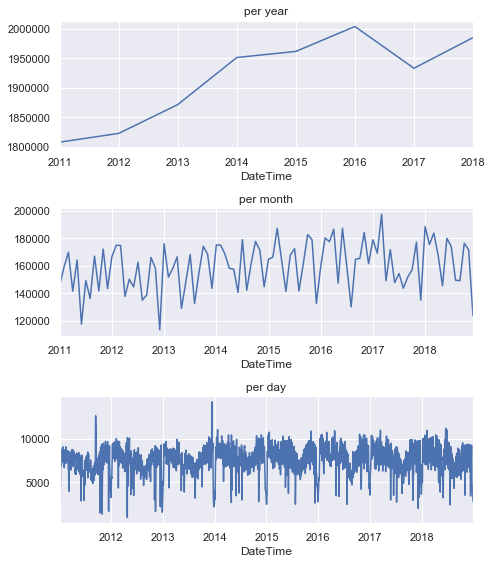

In [68]:
f,axes = plt.subplots(nrows=3,ncols=1,figsize=(7,8))

df["Revenue"].groupby(df.DateTime.dt.to_period("Y")).sum().plot(ax=axes[0],title="per year")
df["Revenue"].groupby(df.DateTime.dt.to_period("M")).sum().plot(ax=axes[1],title="per month")
df["Revenue"].groupby(df.DateTime.dt.to_period("D")).sum().plot(ax=axes[2],title="per day")

f.tight_layout()

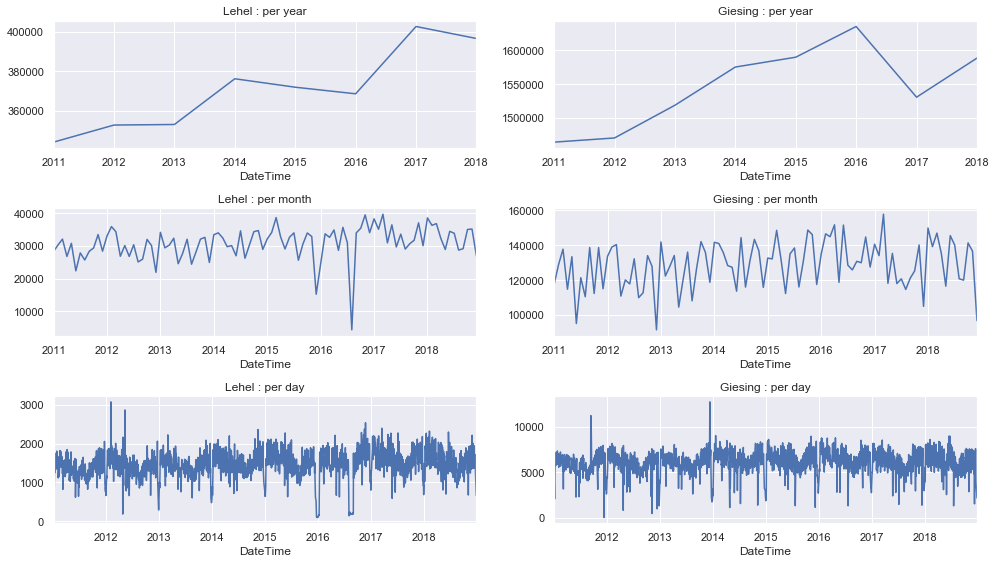

In [69]:
f,axes = plt.subplots(nrows=3,ncols=2,figsize=(14,8))

df[df["location"] == "Lehel"]["Revenue"].groupby(df.DateTime.dt.to_period("Y")).sum().plot(ax=axes[0][0],title="Lehel : per year")
df[df["location"] == "Lehel"]["Revenue"].groupby(df.DateTime.dt.to_period("M")).sum().plot(ax=axes[1][0],title="Lehel : per month")
df[df["location"] == "Lehel"]["Revenue"].groupby(df.DateTime.dt.to_period("D")).sum().plot(ax=axes[2][0],title="Lehel : per day")

df[df["location"] == "Giesing"]["Revenue"].groupby(df.DateTime.dt.to_period("Y")).sum().plot(ax=axes[0][1],title="Giesing : per year")
df[df["location"] == "Giesing"]["Revenue"].groupby(df.DateTime.dt.to_period("M")).sum().plot(ax=axes[1][1],title="Giesing : per month")
df[df["location"] == "Giesing"]["Revenue"].groupby(df.DateTime.dt.to_period("D")).sum().plot(ax=axes[2][1],title="Giesing : per day")

f.tight_layout()

### Per day of weeks

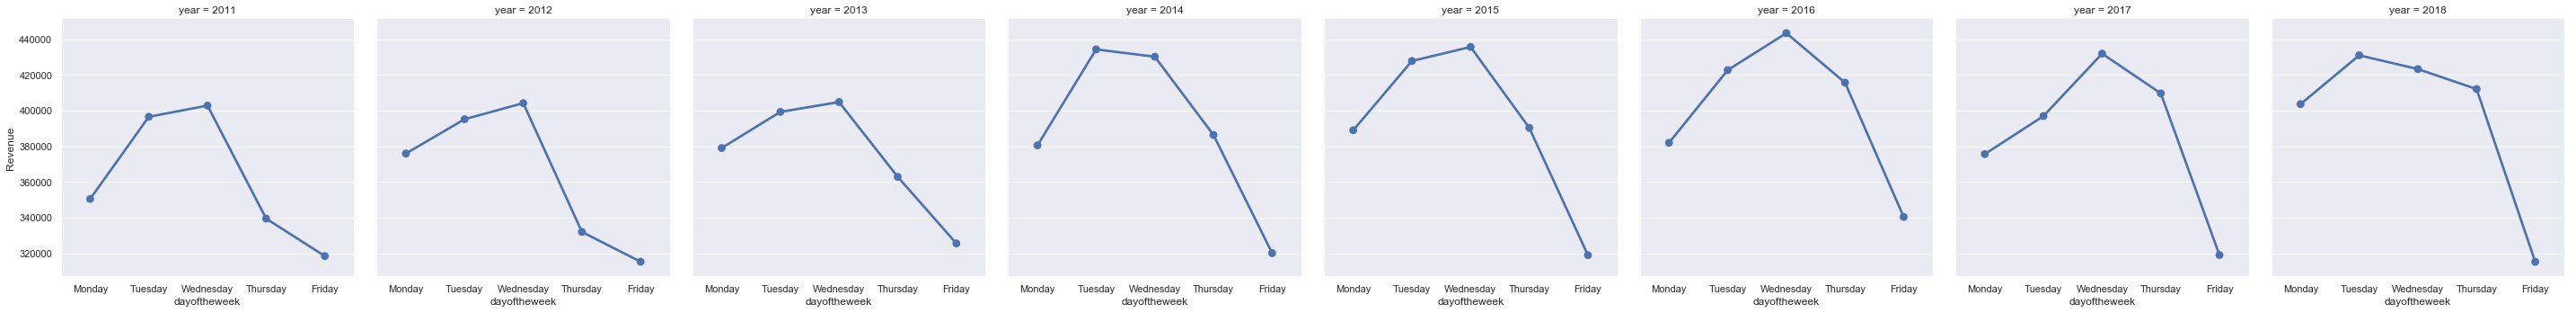

In [70]:
sns.catplot(data=df[["Revenue","year","dayoftheweek"]].groupby(["year","dayoftheweek"]).sum().sort_index().reset_index()
           ,x="dayoftheweek"
           ,y="Revenue"
           ,col="year",kind="point")

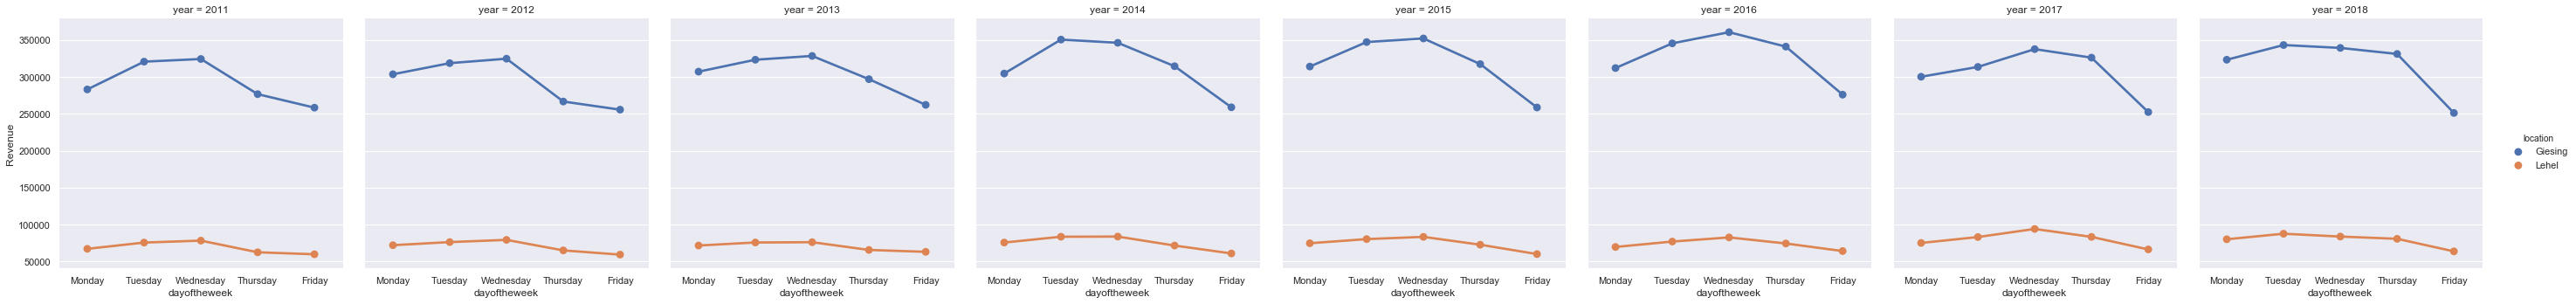

In [71]:
sns.catplot(data=df[["location","Revenue","year","dayoftheweek"]].groupby(["location","year","dayoftheweek"]).sum().sort_index().reset_index()
           ,x="dayoftheweek"
           ,y="Revenue"
           ,col="year"
            ,hue="location",kind="point")

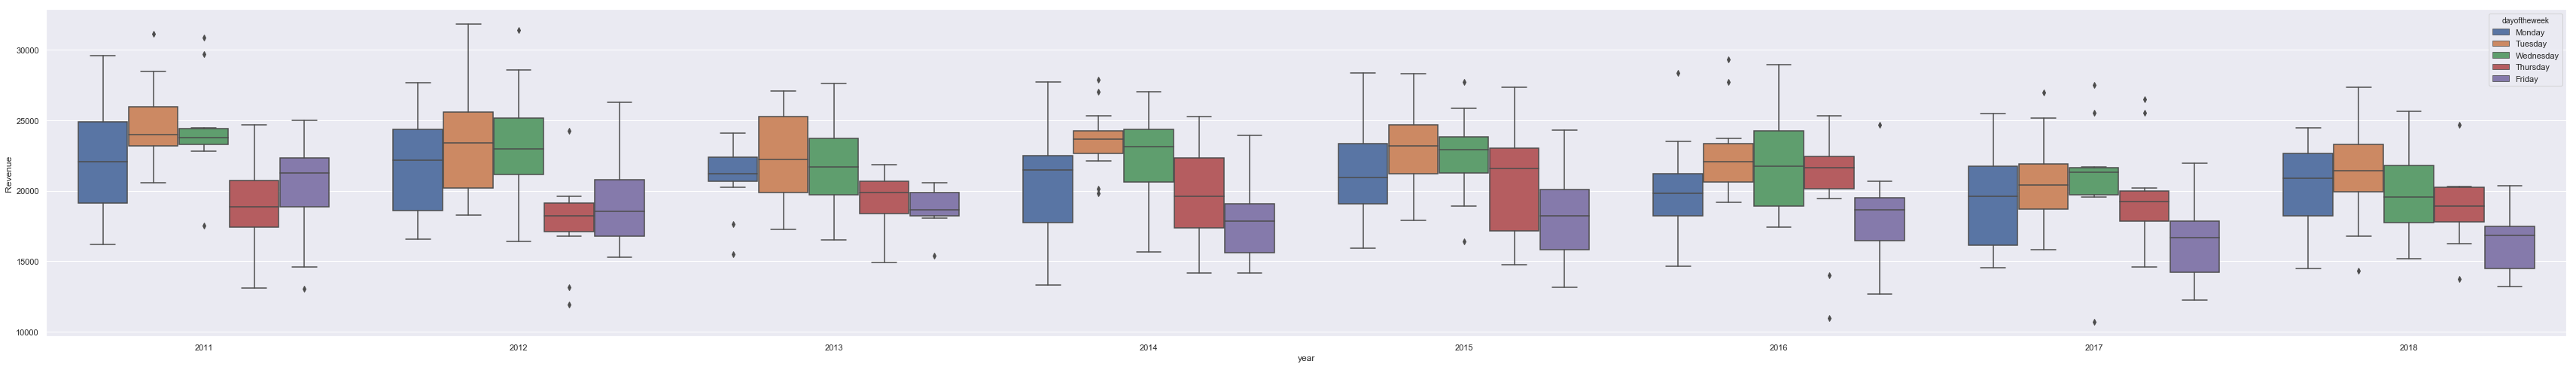

In [72]:
plt.figure(figsize=[60,8])
ax = sns.boxplot(x="year"
                 ,y="Revenue"
                 ,hue="dayoftheweek"
                 ,data=df[["year","month","dayoftheweek","Revenue"]].groupby(["year","month","dayoftheweek"]).count().reset_index())

### Per month

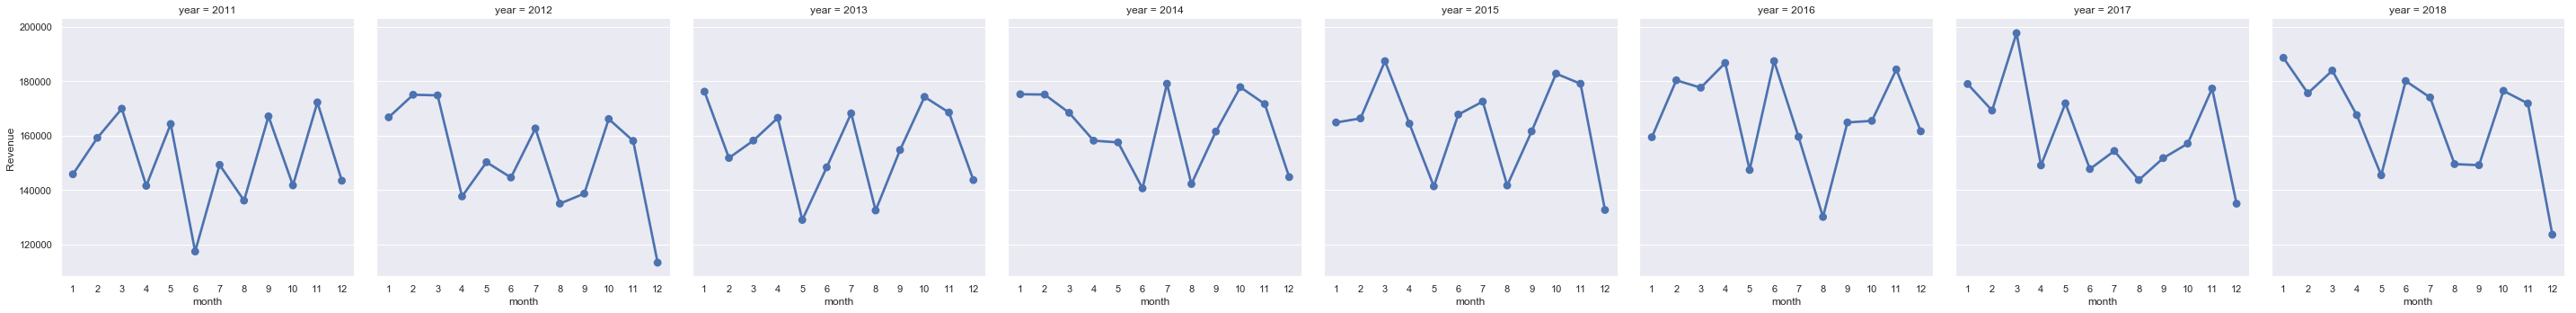

In [73]:
sns.catplot(data=df[["Revenue","month","year"]].groupby(["year","month"]).sum().sort_index().reset_index()
           ,x="month"
           ,y="Revenue"
           ,col="year",kind="point")

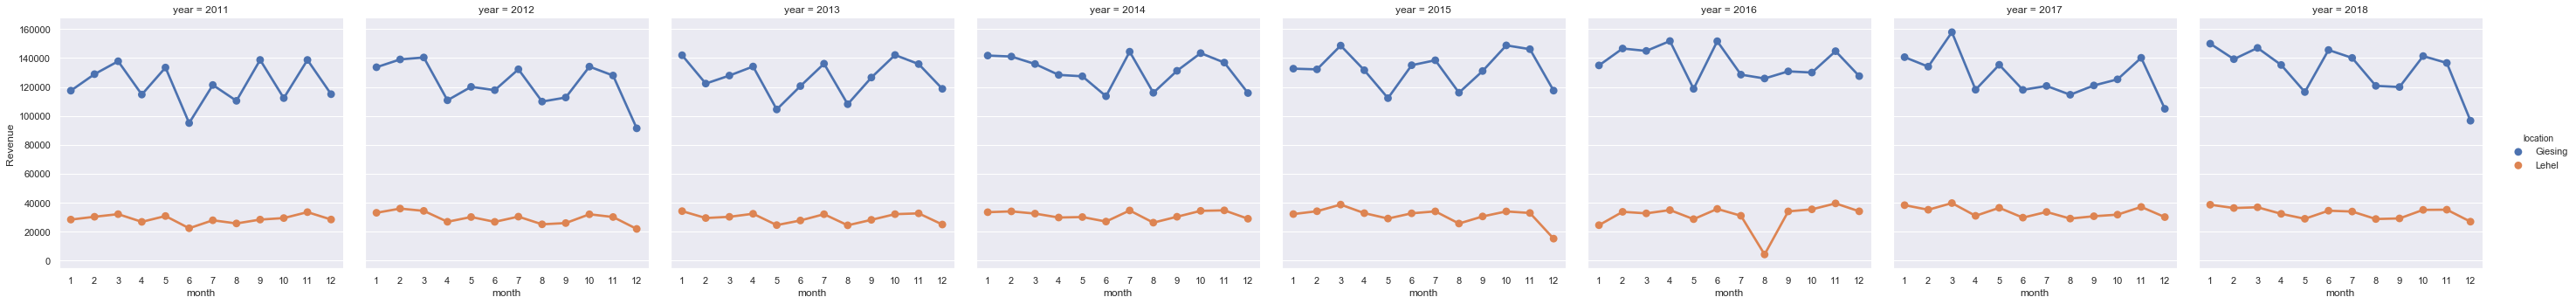

In [74]:
sns.catplot(data=df[["location","Revenue","month","year"]].groupby(["location","year","month"]).sum().sort_index().reset_index()
           ,x="month"
           ,y="Revenue"
           ,col="year"
            ,hue="location",kind="point")

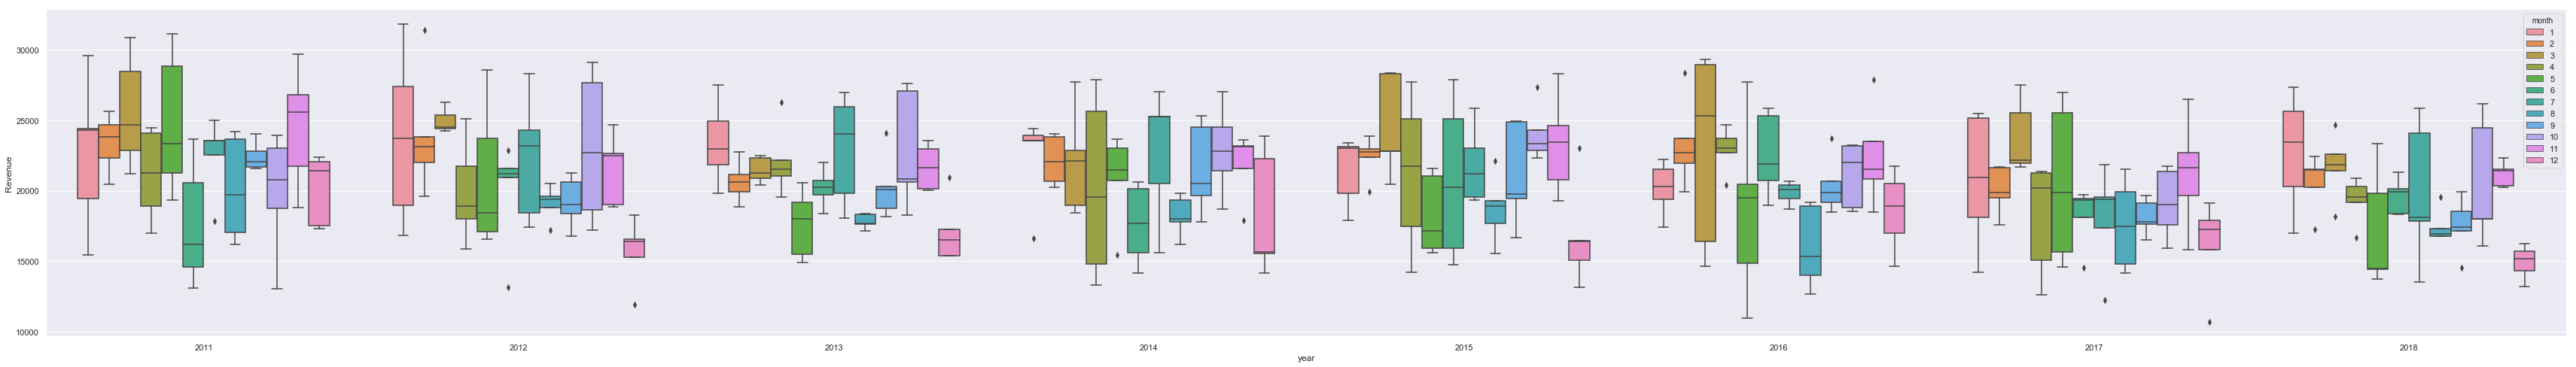

In [75]:
plt.figure(figsize=[60,8])
ax = sns.boxplot(x="year"
                 ,y="Revenue"
                 ,hue="month"
                 ,data=df[["year","month","dayoftheweek","Revenue"]].groupby(["year","month","dayoftheweek"]).count().reset_index())

Even if the number of custumers is decreasing over the years the revenu of the canteen kept growing recording a small decrease in 2017 and then started increasing again in 2018 to reach almost 2 000 000.
This might be explained by either the rise of the price of certains sold items or the increesed taxes, it could be also explained the guest buy more items by individuals.

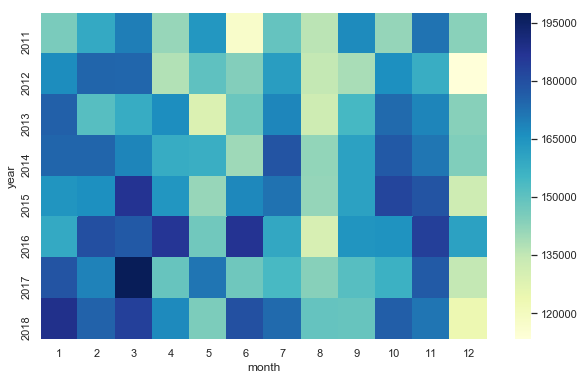

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(values="Revenue",index="year",columns="month",aggfunc=np.sum), cmap="YlGnBu")

### Per Cashpoints : 

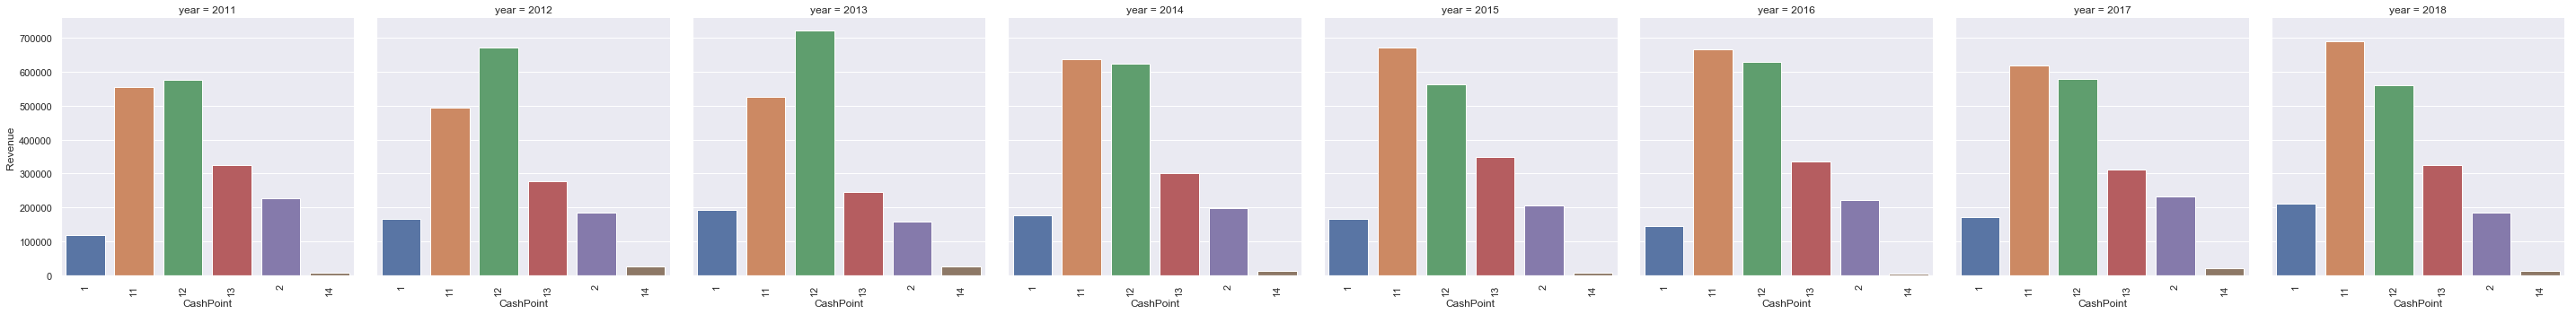

In [77]:
g = sns.catplot(y="Revenue"
            ,x="CashPoint"
            ,col="year"
            ,data=df[["Revenue","year","CashPoint"]].groupby(["year","CashPoint"],observed=True).sum().reset_index()
               ,kind="bar")
g.set_xticklabels(rotation=90)

Cash points 11,12 and 13 are the top 3 best income cash points from 2011 to 2018 and the revenu from geising canteen is over 5 times the revenu of lehel  canteen.
Cash point 12 from 2011 to 2013 was the top income cashpoint until cashPoint 11 took its place in 2014.
As a conclusion, Geising with its four cashpoints has a better income over the years than Lehel with its two cashpoints.

## Menu Matching : 

In [6]:
from xlrd import open_workbook , XLRDError
import os
from IPython.display import clear_output
import locale
locale.setlocale(locale.LC_TIME,"de")

'de'

In [7]:
def executeItemCleaningTask(df,start,stop):
    matchStat = pd.DataFrame(columns=['canteen','week','dayOfWeek','year','month','day','oldItem','newItem','match'])
    df["ItemDescription"]=df['ItemDescription'].astype('str')
    for year in range(start,stop+1):
        matchStat=matchProcess(df,'Mitakus Data/menu/'+str(year),matchStat)
        print(year,' : done')
    return matchStat 

In [8]:
def matchProcess(df,folder_path,matchStat):
    year=  re.findall(r'\d+',folder_path)[0]  #get the year from the path
    #Match week by week
    for path, dirs, files in os.walk(folder_path):
        for filename in files:
            matchStat=match(year,df,folder_path+'/'+filename,filename,matchStat)
    return matchStat

In [9]:
def match(year,df,name,filename,matchStat):
    location    = filename.split('.')[1]
    week        = location[:2]
    canteen     = location[2:]
    try :
        wb       = open_workbook(name, formatting_info=True)
        if(NoPrivateEvent(wb)) :   #check if there is a special Event 
            sheet    = wb.sheet_by_index(2)
            menu     = getMenu(year,week,sheet,wb)
            matchStat=menuMatch(menu,df,canteen,year,week,matchStat)
    except XLRDError as e:
        print(filename,' : ',e)
    return matchStat

In [10]:
def NoPrivateEvent(wb):
    testSheet = wb.sheet_by_index(0)
    if testSheet.cell(1,1).value == 'Casino Giesing Speisekarte':
        return True
    elif testSheet.cell(1,1).value == 'Casino Lehel Speisekarte':
        return True
    return False

In [11]:
def menuMatch(menu,df,canteen,year,week,matchStat):
    liveMatch=0
    TotalItems=0
    for dayofweek,day,month,item in menu:
        TotalItems+=1
        if len(df.loc[(df["location"] == canteen)&(df["year"]==int(year))&(df["month"]==month)&(df["day"]==day)&(df["ItemDescription"].str.contains(item)) , 'ItemDescription'])!=0 :
            df.loc[(df["location"] == canteen)&(df["year"]==int(year))&(df["month"]==month)&(df["day"]==day)&(df["ItemDescription"].str.contains(item)) , 'ItemDescription']=menu[(dayofweek,day,month,item)]
            matchStat=matchStat.append({'canteen':canteen,'week':week,'dayOfWeek':dayofweek,'year':year,'month':month,'day':day,'oldItem':item,'newItem':menu[(dayofweek,day,month,item)],'match':1},ignore_index=True)
            liveMatch+=1
        elif 'BIO' in item :
            item2=re.sub('BIO ','',item)
            if len(df.loc[(df["location"] == canteen)&(df["year"]==int(year))&(df["month"]==month)&(df["day"]==day)&(df["ItemDescription"].str.contains(item2)) , 'ItemDescription'])!=0 :
                df.loc[(df["location"] == canteen)&(df["year"]==int(year))&(df["month"]==month)&(df["day"]==day)&(df["ItemDescription"].str.contains(item2)) , 'ItemDescription']=menu[(dayofweek,day,month,item)]
                matchStat=matchStat.append({'canteen':canteen,'week':week,'dayOfWeek':dayofweek,'year':year,'month':month,'day':day,'oldItem':item2,'newItem':menu[(dayofweek,day,month,item)],'match':1},ignore_index=True)
                liveMatch+=1
            else :    
                matchStat=matchStat.append({'canteen':canteen,'week':week,'dayOfWeek':dayofweek,'year':year,'month':month,'day':day,'oldItem':item,'newItem':'','match':0},ignore_index=True)     
        else :    
            matchStat=matchStat.append({'canteen':canteen,'week':week,'dayOfWeek':dayofweek,'year':year,'month':month,'day':day,'oldItem':item,'newItem':'','match':0},ignore_index=True)      
    if(TotalItems!=0):
        liveProgress='Canteen :  '+canteen+'  Year : '+year+'  Week : '+week+'  Match Accuracy :  '+str(round((liveMatch*100)/TotalItems,2))+'% \n'
        clear_output()
        print(liveProgress)
    return matchStat

In [12]:
def getMenu(year,week,sheet,wb):
    Days=['Montag','Dienstag','Mittwoch','Donnerstag','Freitag','Samstag','Sonntag']
    menu={}
    skip=False
    date=''
    
    for column in range(1,sheet.ncols-1):
        for row in range(sheet.nrows):
            cell = sheet.cell(row,column)  
            color = getCellColor(row,column+1,sheet,wb)

            # if we detect a new day
            if(cell.value in Days):
                #reset parameters and update the date
                day=cell.value
                date,cut,skip,greenItem,yellowItem,redItem=checkPoint(day,week,year)

            # if we detect a text cell
            if(skip==False):
                if cell.ctype==1:
                    if   color in [11,10,13] :       #if we detect a color  
                        greenItem,yellowItem,redItem=colorDetection(color,greenItem,yellowItem,redItem,cell.value)
                        cut=True
                    else :
                        cut=False   #don't cut at the next price
            else:
                skip=False
                
            # now if we detect a price we assign to it the previous items or item       
            if(cell.ctype == 2 and cut == True):
                price=str(cell.value)
                price=price.replace('.',',')
                if   greenItem != '' :
                    greenItem,skip=checkNextCell(row,column,11,greenItem,sheet,wb)     #check the next cell
                    greenItem=cleanItemTxt(greenItem)       #clean the item
                    menu[(day,date.day,date.month,colorDecoder(11,greenItem)+' '+price)] = greenItem     #load the Menu
                    greenItem=''  #reset item

                elif yellowItem != '' :
                    yellowItem,skip=checkNextCell(row,column,13,yellowItem,sheet,wb)   #check the next cell
                    yellowItem=cleanItemTxt(yellowItem)       #clean the item
                    menu[(day,date.day,date.month,colorDecoder(13,yellowItem)+' '+price)] = yellowItem     #load the Menu
                    yellowItem=''  #reset item

                elif redItem != '' :
                    redItem,skip=checkNextCell(row,column,10,redItem,sheet,wb)       #check the next cell
                    redItem=cleanItemTxt(redItem)       #clean the item
                    menu[(day,date.day,date.month,colorDecoder(10,redItem)+' '+price)] = redItem     #load the Menu
                    redItem=''     #reset item
    return menu

In [13]:
def checkNextCell(row,column,color,Item,sheet,wb):
    #check the next cell
    itemCheck  = sheet.cell(row+1, column)
    colorCheck = getCellColor(row+1, column+1,sheet,wb)
    if(itemCheck.ctype == 1 and colorCheck == color):
        Item+=' und '+itemCheck.value
        skip=True # skip one row 
    else :
        skip=False
    return Item,skip

In [14]:
def getCellColor(row,column,sheet,wb):
        cell = sheet.cell(row, column)  
        fmt = wb.xf_list[cell.xf_index]
        return fmt.background.pattern_colour_index

In [15]:
def checkPoint(day,week,year):
    date=updateDate(year,week,day)
    return date,False,False,'','',''

In [16]:
def updateDate(year,week,day):
    return datetime.datetime.strptime(year+'-'+week+'-'+day, "%Y-%W-%A")

In [17]:
def colorDetection(color,greenItem,yellowItem,redItem,newItem):
    if   color==11 :         # if we detect a green cell
        greenItem+=newItem+' '
    elif color==13 :         # if we detect a yellow cell
        yellowItem+=newItem+' '
    elif color==10 :        # if we detect a red cell
        redItem+=newItem+' '
    return greenItem,yellowItem,redItem

In [18]:
def cleanItemTxt(item):
    item=item.replace('\n',' ') #remove \n
    item=re.sub(' +', ' ',item) #reduce spaces
    item=re.sub('- +', '-',item) #remove space after '-'
    return item

In [19]:
def colorDecoder(code,item):
    if(code == 11):
        color = "Grün"
    elif(code == 13): 
        color = "Gelb"
    elif(code == 10):
        color = "Rot"
    if(("bio" )in item.lower()):
        color+=" BIO"
    return color

### Script execution :

In [21]:
matchStat=executeItemCleaningTask(df,2016,2018)

Canteen :  Lehel  Year : 2018  Week : 52  Match Accuracy :  100.0% 


2018  : done


In [22]:
matchStat.to_csv('matchStat.csv' , index=False)

In [27]:
df[df['year']>2015].to_csv('cleanData16-18.csv',index=False)

In [31]:
cleanData16_18=pd.read_csv('cleanData16-18.csv')

In [39]:
cleanData16_18=cleanData16_18.drop(['Date','Time','SubventionLevel'] , axis = 1)

In [43]:
cleanData16_18.to_csv('cleanData16-18.csv',index=False)

## Menu Items Match Summary : 

In [8]:
matchStat=pd.read_csv('matchStat.csv')

### Total Match Accuracy :

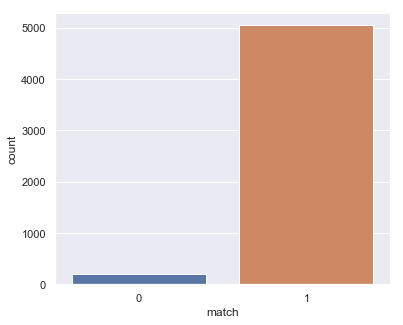

In [9]:
plt.figure(figsize=(6,5))
sns.countplot(data=matchStat ,x='match')

In [21]:
perM=round(len(matchStat[matchStat['match']==1])*100/len(matchStat),2)

print('Matched Items percentage from 2016 to 2018   : ')
print('                  Matched Items Frequency    : ',perM,'%')
print('                  No Matched Items Frequency : ',round(100-perM,2),'%')

Matched Items percentage from 2016 to 2018   : 
                  Matched Items Frequency    :  96.31 %
                  No Matched Items Frequency :  3.69 %


### Match Accuracy Per Year :

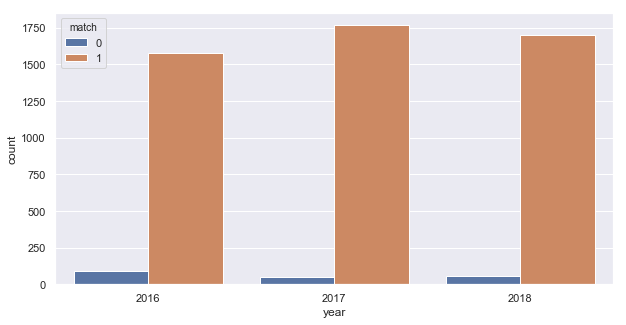

In [255]:
plt.figure(figsize=(10,5))
sns.countplot(data=matchStat ,x='year' , hue='match')

In [19]:
perM16=round(len(matchStat[(matchStat['year']==2016) & (matchStat['match']==1)])*100/len(matchStat[matchStat['year']==2016]),2)
perM17=round(len(matchStat[(matchStat['year']==2017) & (matchStat['match']==1)])*100/len(matchStat[matchStat['year']==2017]),2)
perM18=round(len(matchStat[(matchStat['year']==2018) & (matchStat['match']==1)])*100/len(matchStat[matchStat['year']==2018]),2)

print('Matched Items percentage for 2016    : ')
print('          Matched Items Frequency    : ',perM16,'%')
print('          No Matched Items Frequency : ',round(100-perM16,2),'%')
print('Matched Items percentage for 2017    : ')
print('          Matched Items Frequency    : ',perM17,'%')
print('          No Matched Items Frequency : ',round(100-perM17,2),'%')
print('Matched Items percentage for 2018    : ')
print('          Matched Items Frequency    : ',perM18,'%')
print('          No Matched Items Frequency : ',round(100-perM18,2),'%')

Matched Items percentage for 2016    : 
          Matched Items Frequency    :  94.55 %
          No Matched Items Frequency :  5.45 %
Matched Items percentage for 2017    : 
          Matched Items Frequency    :  97.41 %
          No Matched Items Frequency :  2.59 %
Matched Items percentage for 2018    : 
          Matched Items Frequency    :  96.86 %
          No Matched Items Frequency :  3.14 %


### Match Accuracy Per Canteen :

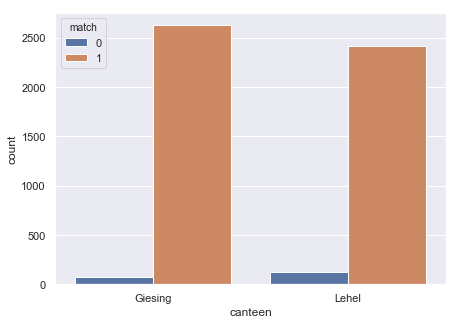

In [256]:
plt.figure(figsize=(7,5))
sns.countplot(data=matchStat ,x='canteen' , hue='match')

In [22]:
perG=round(len(matchStat[(matchStat['canteen']=='Giesing') & (matchStat['match']==1)])*100/len(matchStat[matchStat['canteen']=='Giesing']),2)
perL=round(len(matchStat[(matchStat['canteen']=='Lehel') & (matchStat['match']==1)])*100/len(matchStat[matchStat['canteen']=='Lehel']),2)

print('Matched Items percentage for Giesing from 2016 to 2018  : ')
print('                             Matched Items Frequency    : ',perG,'%')
print('                             No Matched Items Frequency : ',round(100-perG,2),'%')
print('Matched Items percentage for Lehel from 2016 to 2018    : ')
print('                             Matched Items Frequency    : ',perL,'%')
print('                             No Matched Items Frequency : ',round(100-perL,2),'%')

Matched Items percentage for Giesing from 2016 to 2018  : 
                             Matched Items Frequency    :  97.29 %
                             No Matched Items Frequency :  2.71 %
Matched Items percentage for Lehel from 2016 to 2018    : 
                             Matched Items Frequency    :  95.27 %
                             No Matched Items Frequency :  4.73 %


### Match Frequency Per Week For 2016 :

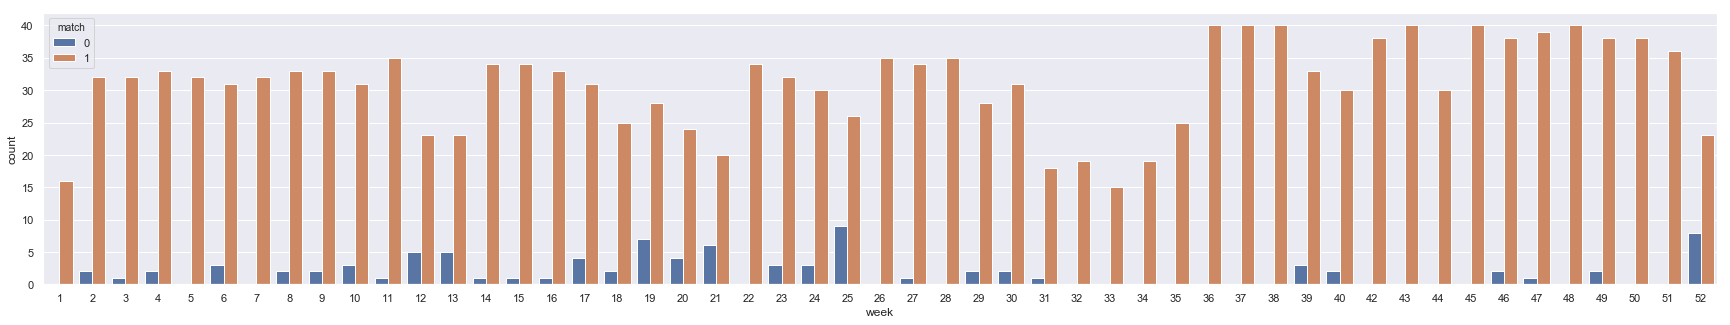

In [234]:
plt.figure(figsize=[30,5])
sns.countplot(data=matchStat[matchStat['year']==2016] ,x='week' , hue='match')

### Match Frequency Per Week For 2017 :

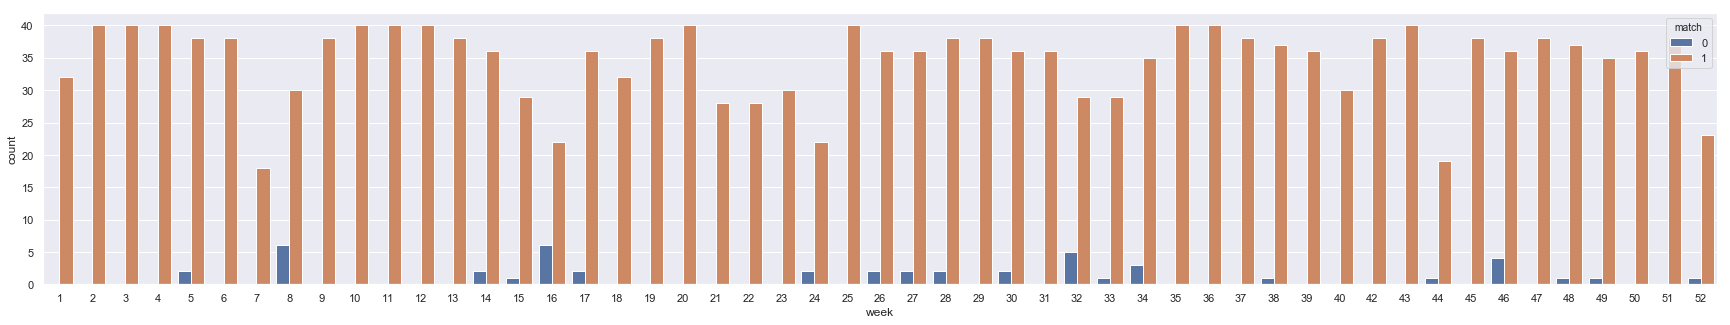

In [228]:
plt.figure(figsize=[30,5])
sns.countplot(data=matchStat[matchStat['year']==2017] ,x='week' , hue='match')

### Match Frequency Per Week For 2018 :

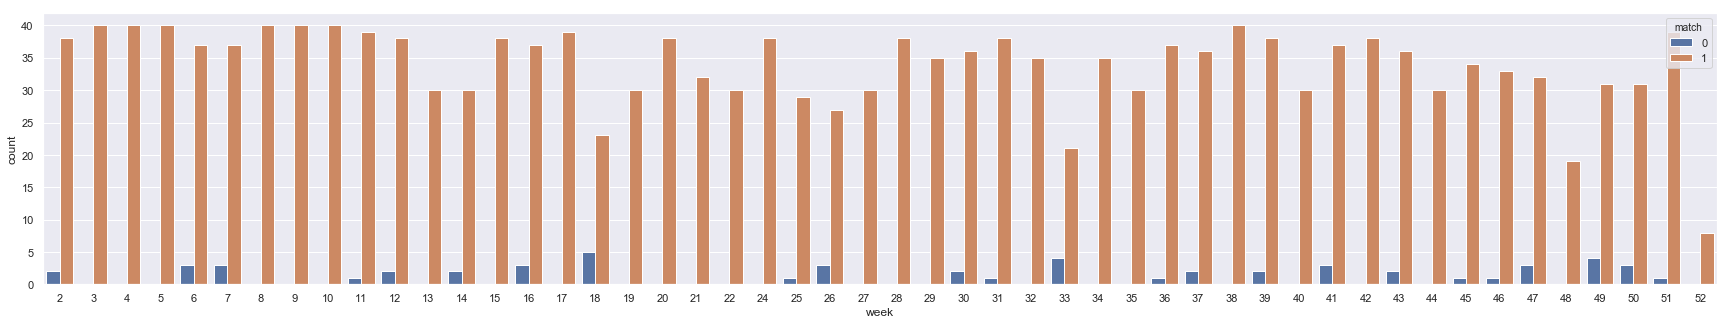

In [262]:
plt.figure(figsize=[30,5])
sns.countplot(data=matchStat[matchStat['year']==2018] ,x='week' , hue='match')